In [293]:
import numpy as np
import csv
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime, timedelta

In [294]:
#loading all the datasets
cab_data = pd.read_csv(r"C:\Users\shrut\Desktop\G2M Cab Data\Cab_Data.csv",encoding="utf-8")
city = pd.read_csv(r"C:\Users\shrut\Desktop\G2M Cab Data\City.csv",encoding="utf-8")
customer_id = pd.read_csv(r"C:\Users\shrut\Desktop\G2M Cab Data\Customer_ID.csv",encoding="utf-8")
transaction_id = pd.read_csv(r"C:\Users\shrut\Desktop\G2M Cab Data\Transaction_ID.csv",encoding="utf-8")
holiday_data = pd.read_csv(r"C:\Users\shrut\Desktop\G2M Cab Data\US Bank holidays.csv",encoding="utf-8")

In [295]:
print('raws = ',cab_data.shape[0], 'Columns = ', cab_data.shape[1])
print(cab_data.dtypes)
cab_data.head()

raws =  359392 Columns =  7
Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08-01-2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06-01-2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02-01-2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07-01-2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03-01-2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [296]:
#Converting the date of travel
def to_date_format(date_str):
    if pd.isnull(date_str):
        return None
    else:
        date_date = datetime.strptime(date_str, "%d-%m-%Y")
        return date_date

cab_data['Date of Travel']=cab_data['Date of Travel'].apply(lambda x:to_date_format(x))
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [297]:
cab_data=cab_data.sort_values(by=['Date of Travel'])
cab_data=cab_data.reset_index(drop=True)

print('rows=',cab_data.shape[0], 'columns=', cab_data.shape[1])
cab_data.head(10)

rows= 359392 columns= 7


Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-02  Yellow Cab  WASHINGTON DC         10.20   
1        10000640     2016-01-02  Yellow Cab     CHICAGO IL         15.60   
2        10000635     2016-01-02  Yellow Cab     CHICAGO IL         25.08   
3        10001001     2016-01-02  Yellow Cab    NEW YORK NY         46.80   
4        10000171     2016-01-02    Pink Cab   SAN DIEGO CA         14.28   
5        10001009     2016-01-02  Yellow Cab     PHOENIX AZ         30.00   
6        10000605     2016-01-02  Yellow Cab     CHICAGO IL         35.52   
7        10001014     2016-01-02  Yellow Cab  SACRAMENTO CA         38.00   
8        10000600     2016-01-02  Yellow Cab     CHICAGO IL         23.75   
9        10000182     2016-01-02    Pink Cab   SAN DIEGO CA          2.36   

   Price Charged  Cost of Trip  
0         202.54      135.8640  
1         374.66      209.6640  
2         532.83      337.0752  
3        1391.91      595.2960  
4         269.15      147.0840  
5        1000.52      403.2000  
6         760.86      430.5024  
7        1065.42      547.2000  
8         531.25      336.3000  
9          47.89       23.6000

In [298]:
round(cab_data.describe(include='all',datetime_is_numeric=True),2)

Transaction ID                 Date of Travel     Company  \
count        359392.00                         359392      359392   
unique             NaN                            NaN           2   
top                NaN                            NaN  Yellow Cab   
freq               NaN                            NaN      274681   
mean       10220761.19  2017-08-17 01:37:55.042294016         NaN   
min        10000011.00            2016-01-02 00:00:00         NaN   
25%        10110809.75            2016-11-23 00:00:00         NaN   
50%        10221035.50            2017-09-10 00:00:00         NaN   
75%        10330937.25            2018-05-12 00:00:00         NaN   
max        10440107.00            2018-12-31 00:00:00         NaN   
std          126805.80                            NaN         NaN   

               City  KM Travelled  Price Charged  Cost of Trip  
count        359392     359392.00      359392.00     359392.00  
unique           19           NaN            NaN           NaN  
top     NEW YORK NY           NaN            NaN           NaN  
freq          99885           NaN            NaN           NaN  
mean            NaN         22.57         423.44        286.19  
min             NaN          1.90          15.60         19.00  
25%             NaN         12.00         206.44        151.20  
50%             NaN         22.44         386.36        282.48  
75%             NaN         32.96         583.66        413.68  
max             NaN         48.00        2048.03        691.20  
std             NaN         12.23         274.38        157.99

In [299]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [300]:
print('raws = ',city.shape[0], 'Columns = ', city.shape[1])
city.head(20)

raws =  20 Columns =  3


City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [301]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [302]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [303]:
city.head()

City  Population     Users
0     NEW YORK NY   8405837.0  302149.0
1      CHICAGO IL   1955130.0  164468.0
2  LOS ANGELES CA   1595037.0  144132.0
3        MIAMI FL   1339155.0   17675.0
4  SILICON VALLEY   1177609.0   27247.0

In [304]:
print('raws = ',customer_id.shape[0], 'Columns = ', customer_id.shape[1])
customer_id.head()

raws =  49171 Columns =  4


Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [305]:
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [306]:
print('raws = ',transaction_id.shape[0], 'Columns = ', transaction_id.shape[1])
transaction_id.head()

raws =  440098 Columns =  3


Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [307]:
transaction_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [308]:
print('raws = ',holiday_data.shape[0], 'Columns = ', holiday_data.shape[1])
holiday_data.head()

raws =  90 Columns =  2


Date                                Holiday
0   1/2/2012                           New Year Day
1  1/16/2012             Martin Luther King Jr. Day
2  2/20/2012  Presidents Day (Washingtons Birthday)
3  5/28/2012                           Memorial Day
4   7/4/2012                       Independence Day

In [309]:
holiday_data.dtypes

Date       object
Holiday    object
dtype: object

In [310]:
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])
holiday_data.dtypes

Date       datetime64[ns]
Holiday            object
dtype: object

In [311]:
cab_data.head(1)

Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-02  Yellow Cab  WASHINGTON DC          10.2   

   Price Charged  Cost of Trip  
0         202.54       135.864

In [312]:
city.head(1)

City  Population     Users
0  NEW YORK NY   8405837.0  302149.0

In [313]:
customer_id.head(1)

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813

In [314]:
transaction_id.head(1)

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card

In [315]:
holiday_data.head(1)

Date       Holiday
0 2012-01-02  New Year Day

In [316]:
cab_data['is_holiday'] = cab_data['Date of Travel'].isin(holiday_data['Date']).astype(bool)
cab_data.head()

Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-02  Yellow Cab  WASHINGTON DC         10.20   
1        10000640     2016-01-02  Yellow Cab     CHICAGO IL         15.60   
2        10000635     2016-01-02  Yellow Cab     CHICAGO IL         25.08   
3        10001001     2016-01-02  Yellow Cab    NEW YORK NY         46.80   
4        10000171     2016-01-02    Pink Cab   SAN DIEGO CA         14.28   

   Price Charged  Cost of Trip  is_holiday  
0         202.54      135.8640       False  
1         374.66      209.6640       False  
2         532.83      337.0752       False  
3        1391.91      595.2960       False  
4         269.15      147.0840       False

In [317]:
master_df = cab_data.merge(transaction_id, on= 'Transaction ID').merge(customer_id,on ='Customer ID').merge(city, on = 'City')
print('raws = ',master_df.shape[0], 'Columns = ', master_df.shape[1])
master_df.head()

raws =  359392 Columns =  15


Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-02  Yellow Cab  WASHINGTON DC         10.20   
1        10020018     2016-03-26  Yellow Cab  WASHINGTON DC          5.94   
2        10102932     2016-11-09    Pink Cab  WASHINGTON DC         15.21   
3        10164725     2017-04-17  Yellow Cab  WASHINGTON DC          8.08   
4        10188478     2017-06-24  Yellow Cab  WASHINGTON DC         13.80   

   Price Charged  Cost of Trip  is_holiday  Customer ID Payment_Mode Gender  \
0         202.54      135.8640       False        52536         Card   Male   
1          88.50       74.1312       False        52536         Cash   Male   
2         179.33      153.6210       False        52536         Cash   Male   
3         123.21      104.7168       False        52536         Card   Male   
4         283.74      168.9120       False        52536         Cash   Male   

   Age  Income (USD/Month)  Population     Users  
0   24               10606    418859.0  127001.0  
1   24               10606    418859.0  127001.0  
2   24               10606    418859.0  127001.0  
3   24               10606    418859.0  127001.0  
4   24               10606    418859.0  127001.0

In [318]:
#Explorarty data analysis
#description of dataset
round(master_df.describe(datetime_is_numeric=True, include='all'),2)

Transaction ID                 Date of Travel     Company  \
count        359392.00                         359392      359392   
unique             NaN                            NaN           2   
top                NaN                            NaN  Yellow Cab   
freq               NaN                            NaN      274681   
mean       10220761.19  2017-08-17 01:37:55.042293760         NaN   
min        10000011.00            2016-01-02 00:00:00         NaN   
25%        10110809.75            2016-11-23 00:00:00         NaN   
50%        10221035.50            2017-09-10 00:00:00         NaN   
75%        10330937.25            2018-05-12 00:00:00         NaN   
max        10440107.00            2018-12-31 00:00:00         NaN   
std          126805.80                            NaN         NaN   

               City  KM Travelled  Price Charged  Cost of Trip is_holiday  \
count        359392     359392.00      359392.00     359392.00     359392   
unique           19           NaN            NaN           NaN          2   
top     NEW YORK NY           NaN            NaN           NaN      False   
freq          99885           NaN            NaN           NaN     351815   
mean            NaN         22.57         423.44        286.19        NaN   
min             NaN          1.90          15.60         19.00        NaN   
25%             NaN         12.00         206.44        151.20        NaN   
50%             NaN         22.44         386.36        282.48        NaN   
75%             NaN         32.96         583.66        413.68        NaN   
max             NaN         48.00        2048.03        691.20        NaN   
std             NaN         12.23         274.38        157.99        NaN   

        Customer ID Payment_Mode  Gender        Age  Income (USD/Month)  \
count     359392.00       359392  359392  359392.00           359392.00   
unique          NaN            2       2        NaN                 NaN   
top             NaN         Card    Male        NaN                 NaN   
freq            NaN       215504  205912        NaN                 NaN   
mean       19191.65          NaN     NaN      35.34            15048.82   
min            1.00          NaN     NaN      18.00             2000.00   
25%         2705.00          NaN     NaN      25.00             8424.00   
50%         7459.00          NaN     NaN      33.00            14685.00   
75%        36078.00          NaN     NaN      42.00            21035.00   
max        60000.00          NaN     NaN      65.00            35000.00   
std        21012.41          NaN     NaN      12.59             7969.41   

        Population      Users  
count    359392.00  359392.00  
unique         NaN        NaN  
top            NaN        NaN  
freq           NaN        NaN  
mean    3132198.04  158365.58  
min      248968.00    3643.00  
25%      671238.00   80021.00  
50%     1595037.00  144132.00  
75%     8405837.00  302149.00  
max     8405837.00  302149.00  
std     3315194.39  100850.05

Text(0.5, 0, 'Km Travelled')

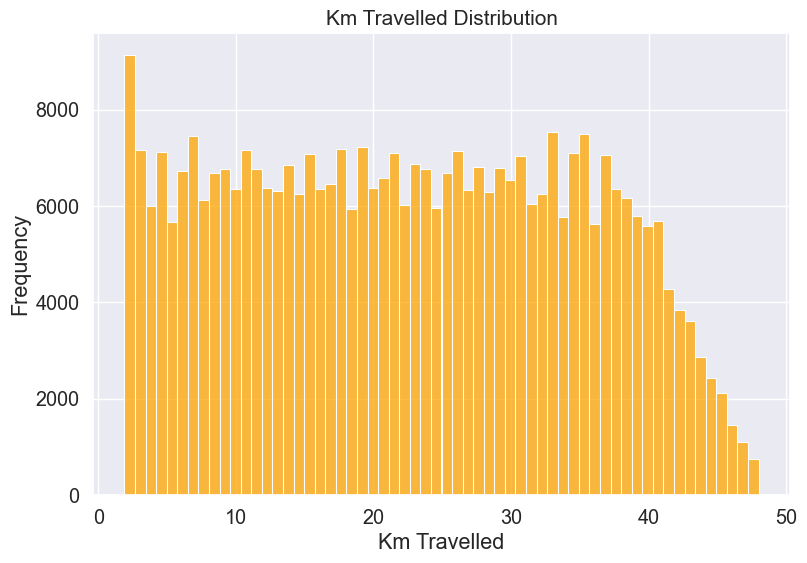

In [319]:
#FEATURE ANALYSIS
#DISTANCE TRAVELED (in KM)
plt.figure(figsize=(9,6))
ax=sns.histplot(data=master_df, x="KM Travelled",bins=60, color= 'orange')
plt.title('Km Travelled Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Text(0.5, 0, 'Price Charged')

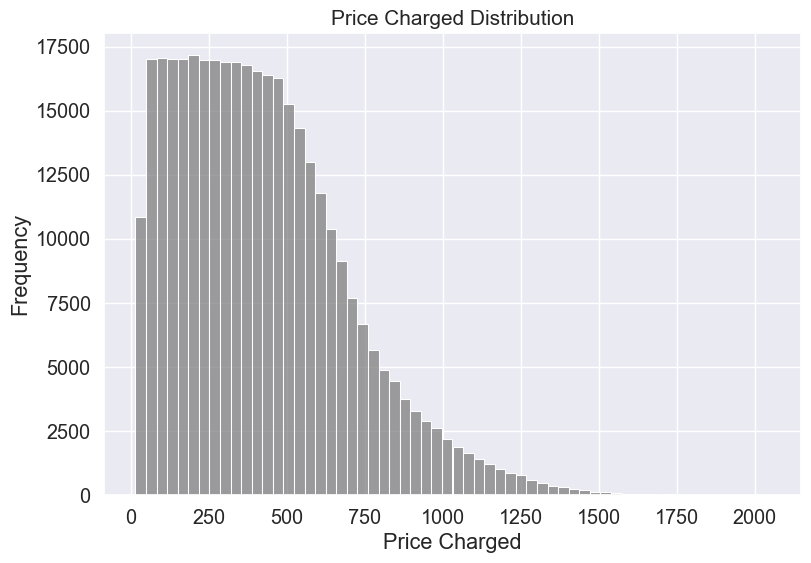

In [320]:
#PRICE CHARGED PER TRIP
plt.figure(figsize=(9,6))
sns.histplot(data=master_df, x="Price Charged",bins=60 , color= 'grey')
plt.title('Price Charged Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

Text(0.5, 0, 'Cost of Trip')

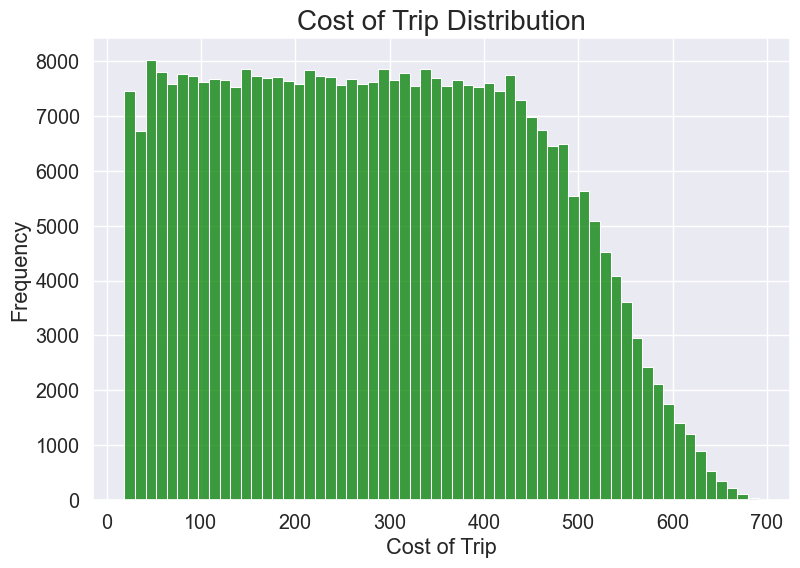

In [321]:
#TOTAL COST OF THE TRIP
plt.figure(figsize=(9,6))
sns.histplot(data= master_df,x="Cost of Trip",bins=60 , color= 'green')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Payment Mode')

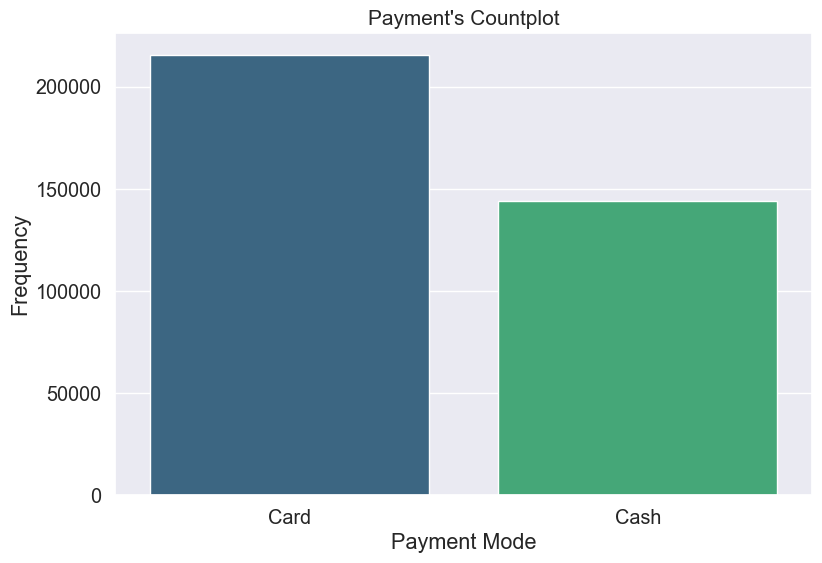

In [322]:
#PAYMENT MODES USED
plt.figure(figsize=(9,6))
sns.countplot(data=master_df, x="Payment_Mode", palette='viridis')
plt.title("Payment's Countplot", fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

Text(0.5, 0, 'Gender')

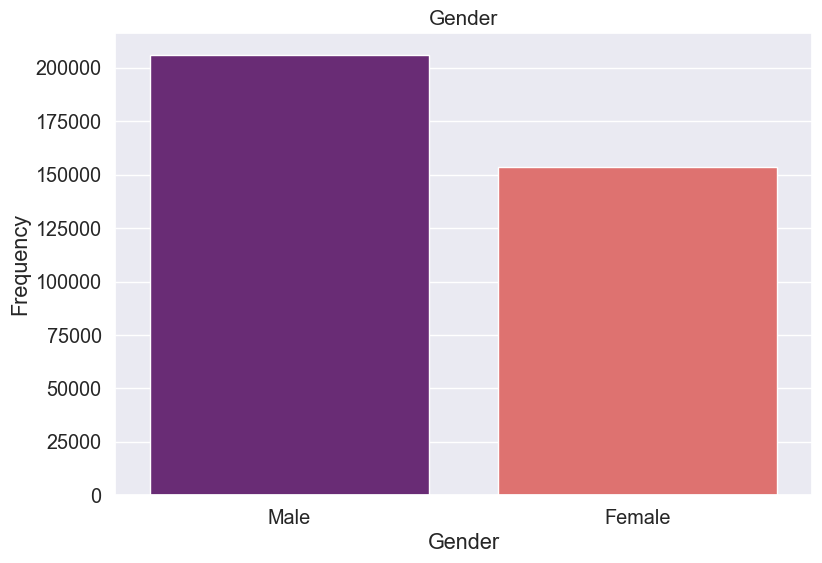

In [323]:
#GENDER USE CASE
plt.figure(figsize=(9,6))
sns.countplot(data=master_df, x="Gender", palette='magma')
plt.title('Gender', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Gender')

Text(0.5, 0, 'Age')

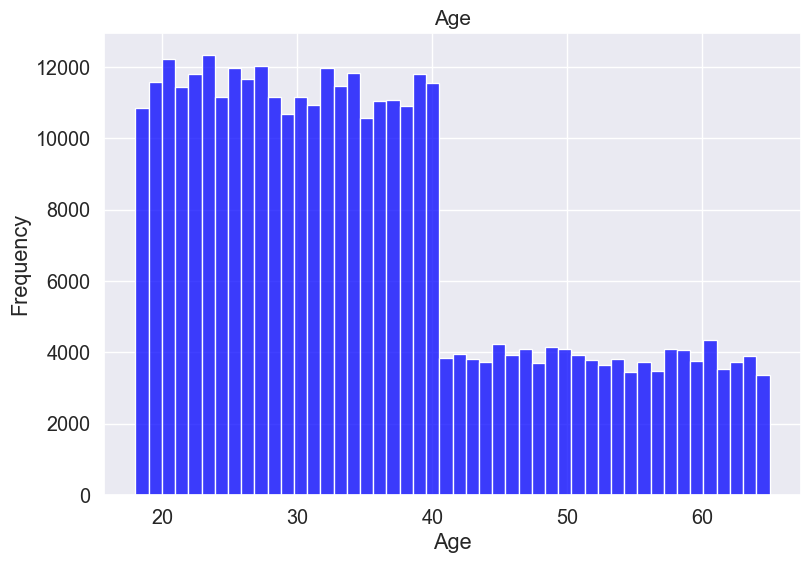

In [324]:
#AGE DISTRIBUTION ACROSS USERS
plt.figure(figsize=(9,6))
sns.histplot(data= master_df,x="Age",bins=48 , color= 'blue')
plt.title('Age', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Age')

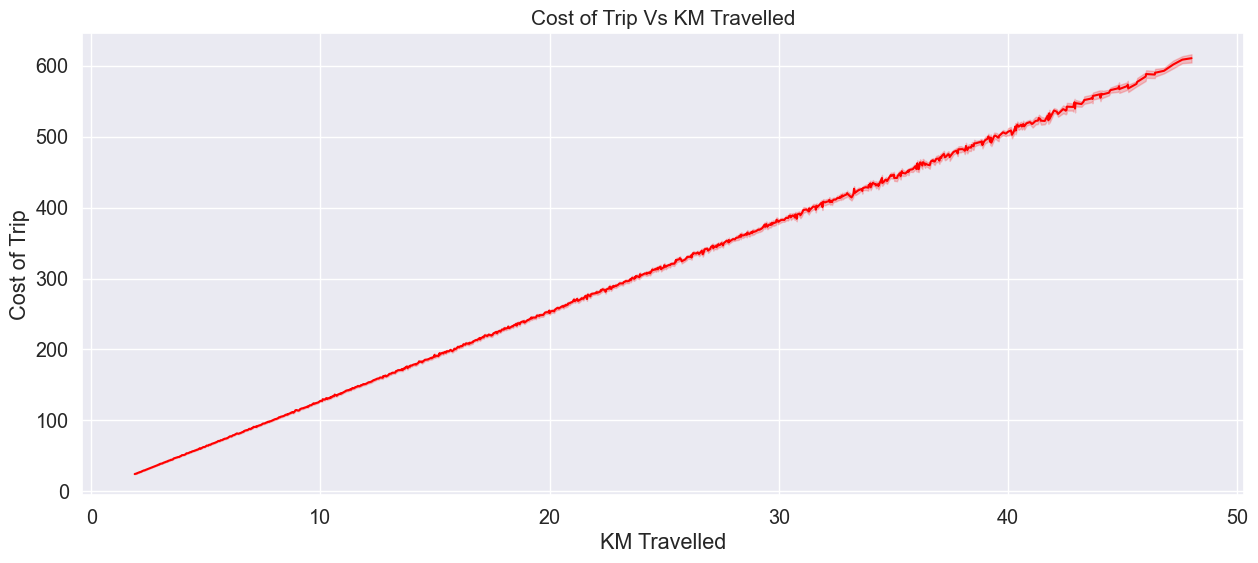

In [381]:
#COST PER KM
plt.figure(figsize=(15,6))
sns.lineplot(data=master_df, x="KM Travelled",y='Cost of Trip', color= 'red')
plt.title('Cost of Trip Vs KM Travelled', fontsize=15)
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.show()

Text(0.5, 0, 'is_holiday')

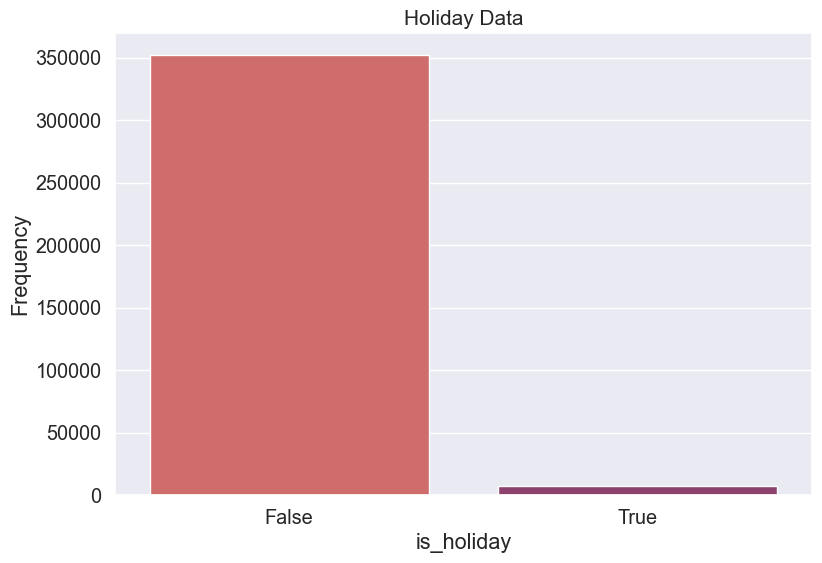

In [326]:
#HOLIDAY DATA 
plt.figure(figsize=(9,6))
sns.countplot(data=master_df, x="is_holiday", palette='flare')
plt.title('Holiday Data', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('is_holiday')

In [327]:
#CORRELATIONS BETWEEN THE DATAS
master_df.corr()

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
is_holiday                0.010756      0.000299      -0.006068     -0.000579   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   
Population                0.023868     -0.002311       0.326589      0.015108   
Users                     0.013526     -0.000428       0.281061      0.023628   

                    is_holiday  Customer ID       Age  Income (USD/Month)  \
Transaction ID        0.010756    -0.016912 -0.001267           -0.001570   
KM Travelled          0.000299     0.000389 -0.000369           -0.000544   
Price Charged        -0.006068    -0.177324 -0.003084            0.003228   
Cost of Trip         -0.000579     0.003077 -0.000189           -0.000633   
is_holiday            1.000000    -0.000231  0.000973           -0.000289   
Customer ID          -0.000231     1.000000 -0.004735           -0.013608   
Age                   0.000973    -0.004735  1.000000            0.003907   
Income (USD/Month)   -0.000289    -0.013608  0.003907            1.000000   
Population            0.000740    -0.647052 -0.009002            0.011868   
Users                -0.000853    -0.610742 -0.005906            0.010464   

                    Population     Users  
Transaction ID        0.023868  0.013526  
KM Travelled         -0.002311 -0.000428  
Price Charged         0.326589  0.281061  
Cost of Trip          0.015108  0.023628  
is_holiday            0.000740 -0.000853  
Customer ID          -0.647052 -0.610742  
Age                  -0.009002 -0.005906  
Income (USD/Month)    0.011868  0.010464  
Population            1.000000  0.915490  
Users                 0.915490  1.000000

In [328]:
#CHECKING THE DATA TYPES
master_df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
is_holiday                      bool
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object

In [329]:
master_df['Income (USD/Month)'] = master_df['Income (USD/Month)'].astype(float)
master_df['Population'] = master_df['Population'].astype(int)
master_df['Users'] = master_df['Users'].astype(int)
master_df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
is_holiday                      bool
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                     int32
Users                          int32
dtype: object

In [330]:
#CODE SNIPPET FOR THE MISSING VALUES
master_df.apply(lambda x: sum(x.isnull()),axis=0)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
is_holiday            0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [331]:
#DUPLICATES CHECKER
duplicated_rows = master_df[master_df.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


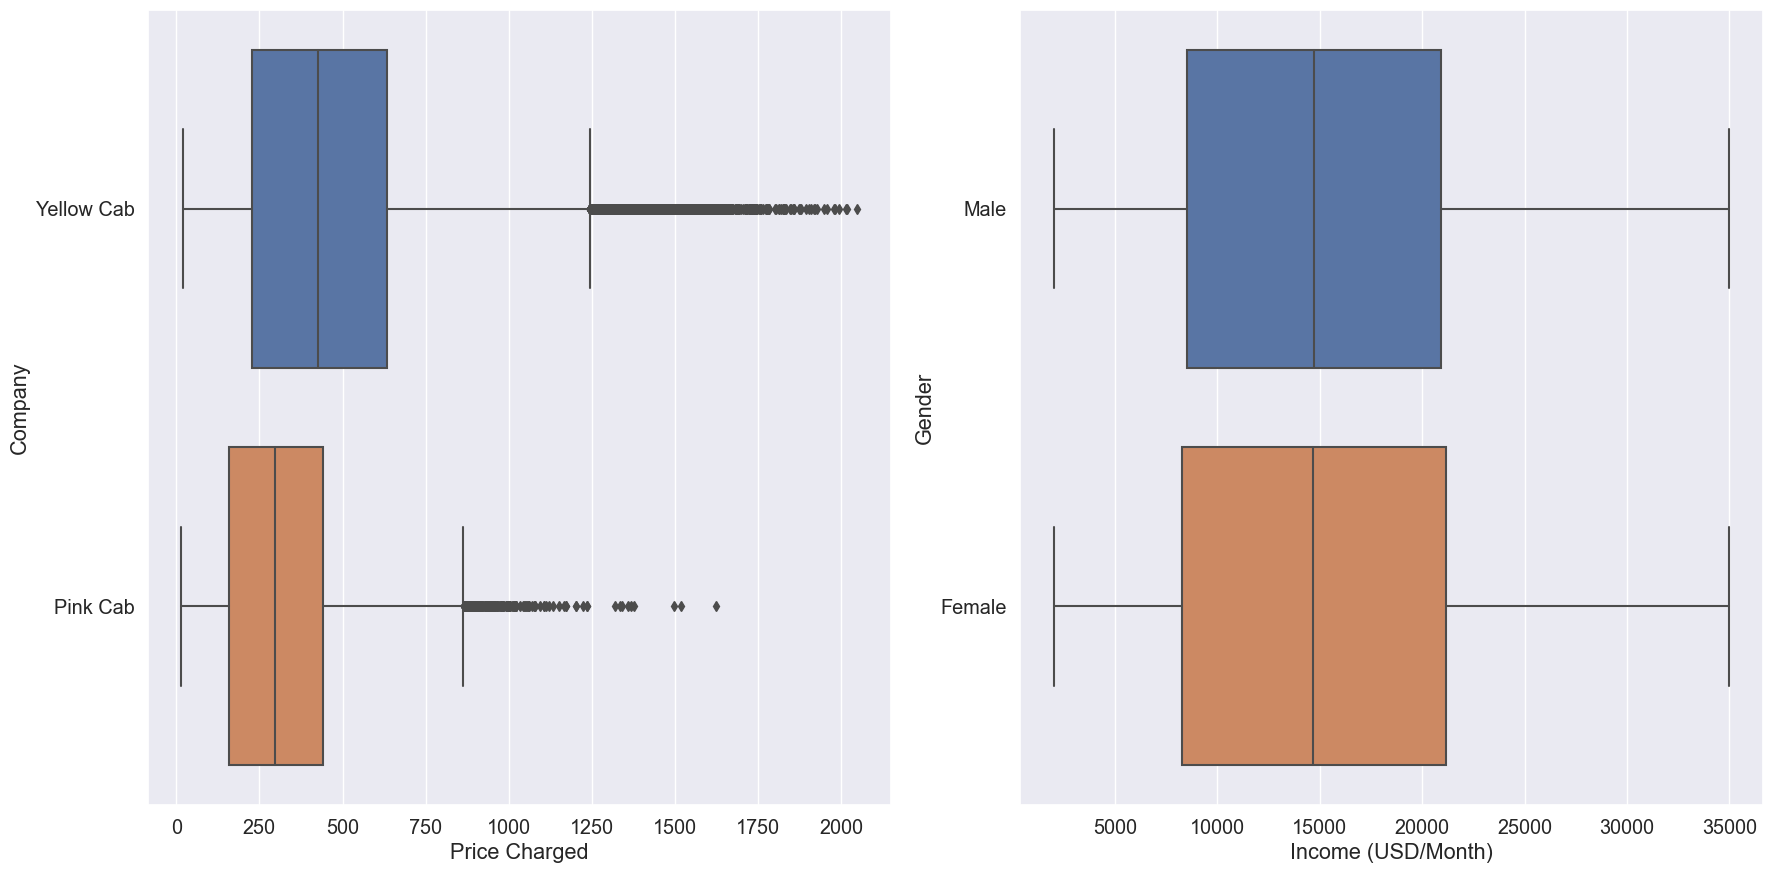

In [332]:
#OUTLIERS
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
sns.set(font_scale = 1.3)
sns.boxplot(data = master_df, y = 'Company', x = "Price Charged", dodge=False)
plt.subplot(1,2,2)
sns.set(font_scale = 1.3)
sns.boxplot(data = master_df, y = 'Gender', x = "Income (USD/Month)", dodge=False)
plt.tight_layout()
plt.show()

In [333]:
#TIME SERIES ANALYSIS
#Creating a new dataset same as master dataframe and setting 'Date of Travel' as index to work properly Time Series Visualizations.
master_df['Year of Travel'] = master_df['Date of Travel'].dt.year
master_df['Month of Travel'] = master_df['Date of Travel'].dt.month
master_df['Day of Travel'] = master_df['Date of Travel'].dt.day
master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']

master_st=master_df.set_index('Date of Travel')
master_st.sort_values('Date of Travel').head()

Transaction ID     Company            City  KM Travelled  \
Date of Travel                                                             
2016-01-02            10001340  Yellow Cab   WASHINGTON DC         10.20   
2016-01-02            10001254  Yellow Cab  SILICON VALLEY         42.12   
2016-01-02            10001242  Yellow Cab  SILICON VALLEY         18.02   
2016-01-02            10000885  Yellow Cab     NEW YORK NY         32.20   
2016-01-02            10000961  Yellow Cab     NEW YORK NY         19.04   

                Price Charged  Cost of Trip  is_holiday  Customer ID  \
Date of Travel                                                         
2016-01-02             202.54      135.8640       False        52536   
2016-01-02            1342.05      520.6032       False        13894   
2016-01-02             658.65      240.0264       False        14513   
2016-01-02             940.73      452.0880       False         1698   
2016-01-02             634.46      253.6128       False           85   

               Payment_Mode Gender  Age  Income (USD/Month)  Population  \
Date of Travel                                                            
2016-01-02             Card   Male   24             10606.0      418859   
2016-01-02             Card   Male   32             21898.0     1177609   
2016-01-02             Card   Male   62              3892.0     1177609   
2016-01-02             Card   Male   23             22120.0     8405837   
2016-01-02             Card   Male   19             19765.0     8405837   

                 Users  Year of Travel  Month of Travel  Day of Travel  \
Date of Travel                                                           
2016-01-02      127001            2016                1              2   
2016-01-02       27247            2016                1              2   
2016-01-02       27247            2016                1              2   
2016-01-02      302149            2016                1              2   
2016-01-02      302149            2016                1              2   

                  Profit  
Date of Travel            
2016-01-02       66.6760  
2016-01-02      821.4468  
2016-01-02      418.6236  
2016-01-02      488.6420  
2016-01-02      380.8472

In [334]:
#YELLOW CAB VS PINK CAB
#Creating separate datasets for each company

#YELLOW CAB
yellow_cab_st= master_st[master_st['Company']=='Yellow Cab']
print(yellow_cab_st.shape)
yellow_cab_st.head()

yellow_cab= master_df[master_df.Company.isin(['Yellow Cab'])]
print(yellow_cab.shape)
yellow_cab.head()

(274681, 18)
(274681, 19)


Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-02  Yellow Cab  WASHINGTON DC         10.20   
1        10020018     2016-03-26  Yellow Cab  WASHINGTON DC          5.94   
3        10164725     2017-04-17  Yellow Cab  WASHINGTON DC          8.08   
4        10188478     2017-06-24  Yellow Cab  WASHINGTON DC         13.80   
6        10261473     2017-11-17  Yellow Cab  WASHINGTON DC         11.60   

   Price Charged  Cost of Trip  is_holiday  Customer ID Payment_Mode Gender  \
0         202.54      135.8640       False        52536         Card   Male   
1          88.50       74.1312       False        52536         Cash   Male   
3         123.21      104.7168       False        52536         Card   Male   
4         283.74      168.9120       False        52536         Cash   Male   
6         180.50      144.7680       False        52536         Cash   Male   

   Age  Income (USD/Month)  Population   Users  Year of Travel  \
0   24             10606.0      418859  127001            2016   
1   24             10606.0      418859  127001            2016   
3   24             10606.0      418859  127001            2017   
4   24             10606.0      418859  127001            2017   
6   24             10606.0      418859  127001            2017   

   Month of Travel  Day of Travel    Profit  
0                1              2   66.6760  
1                3             26   14.3688  
3                4             17   18.4932  
4                6             24  114.8280  
6               11             17   35.7320

In [335]:
#PINK CAB
pink_cab_st= master_st[master_st.Company.isin(['Pink Cab'])]
print(pink_cab_st.shape)
pink_cab_st.head()
pink_cab= master_df[master_df.Company.isin(['Pink Cab'])]
print(pink_cab.shape)
pink_cab.head()

(84711, 18)
(84711, 19)


Transaction ID Date of Travel   Company           City  KM Travelled  \
2         10102932     2016-11-09  Pink Cab  WASHINGTON DC         15.21   
5         10249981     2017-10-31  Pink Cab  WASHINGTON DC         28.00   
19        10242139     2017-10-20  Pink Cab  WASHINGTON DC         26.78   
29        10143658     2017-02-11  Pink Cab  WASHINGTON DC         42.55   
63        10125156     2016-12-21  Pink Cab  WASHINGTON DC         10.00   

    Price Charged  Cost of Trip  is_holiday  Customer ID Payment_Mode Gender  \
2          179.33       153.621       False        52536         Cash   Male   
5          424.20       280.000       False        52536         Card   Male   
19         371.96       313.326       False        53683         Card   Male   
29         504.03       489.325       False        53126         Cash   Male   
63         151.06       104.000       False        51580         Card   Male   

    Age  Income (USD/Month)  Population   Users  Year of Travel  \
2    24             10606.0      418859  127001            2016   
5    24             10606.0      418859  127001            2017   
19   26              9389.0      418859  127001            2017   
29   24              3032.0      418859  127001            2017   
63   51              6115.0      418859  127001            2016   

    Month of Travel  Day of Travel   Profit  
2                11              9   25.709  
5                10             31  144.200  
19               10             20   58.634  
29                2             11   14.705  
63               12             21   47.060

In [336]:
#SUMMARY OF PROFIT
p=master_df.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
p.head(6)
q=master_df.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')
q.head()
q['%Profit'] =(p['Profit']*100) /q['Price']
q.head(6)

Price    %Profit
Company    Year of Travel                        
Pink Cab   2016             7908479.23  21.666760
           2017             9578629.54  21.231168
           2018             8841142.56  17.646613
Yellow Cab 2016            38481133.18  36.191750
           2017            45818910.04  36.177155
           2018            41553843.97  32.529842

In [337]:
#PROFIT ANALYSIS OF YELLOW Vs PINK
y=yellow_cab_st.Profit.resample('Y').sum()
ypy= pd.DataFrame(y)

p=pink_cab_st.Profit.resample('Y').sum()
ppy= pd.DataFrame(p)
print(ypy)
print(ppy)

y=yellow_cab_st.Profit.resample('m').sum()
ypm= pd.DataFrame(y)
p=pink_cab_st.Profit.resample('m').sum()
ppm= pd.DataFrame(p)
print(ypm.head())
print(ppm.head())

                      Profit
Date of Travel              
2016-12-31      1.392700e+07
2017-12-31      1.657598e+07
2018-12-31      1.351740e+07
                     Profit
Date of Travel             
2016-12-31      1713511.224
2017-12-31      2033654.908
2018-12-31      1560162.189
                      Profit
Date of Travel              
2016-01-31      8.363081e+05
2016-02-29      1.009169e+06
2016-03-31      9.147648e+05
2016-04-30      9.461364e+05
2016-05-31      1.282773e+06
                   Profit
Date of Travel           
2016-01-31      73952.863
2016-02-29      87475.544
2016-03-31      87801.183
2016-04-30      82591.853
2016-05-31      61550.958


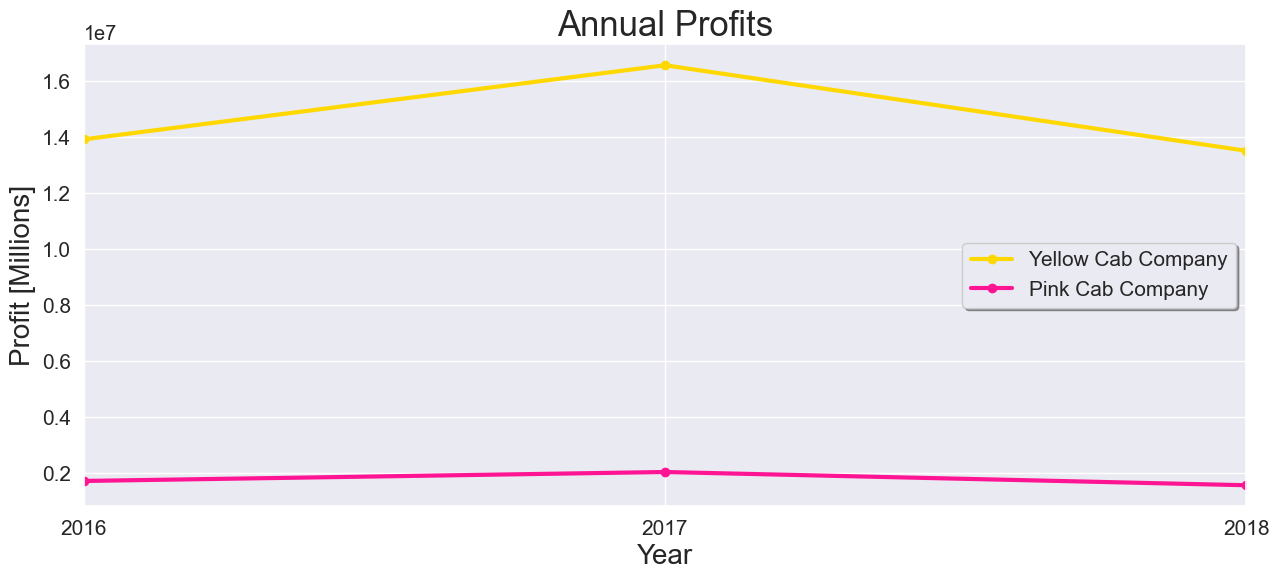

In [338]:
ypy['ProfitORides']= ypy['Profit']/yellow_cab['Date of Travel'].value_counts().resample('Y').sum()
ppy['ProfitORides']= ppy['Profit']/pink_cab['Date of Travel'].value_counts().resample('Y').sum()
ypm['ProfitORides']= ypm['Profit']/yellow_cab['Date of Travel'].value_counts().resample('m').sum()
ppm['ProfitORides']= ppm['Profit']/pink_cab['Date of Travel'].value_counts().resample('m').sum()
ypy['ProfitOKM']= ypy['Profit']/yellow_cab_st['KM Travelled'].resample('Y').sum()
ppy['ProfitOKM']= ppy['Profit']/pink_cab_st['KM Travelled'].resample('Y').sum()
ypm['ProfitOKM']= ypm['Profit']/yellow_cab_st['KM Travelled'].resample('m').sum()
ppm['ProfitOKM']= ppm['Profit']/pink_cab_st['KM Travelled'].resample('m').sum()

plt.figure(figsize=(15,6))

fig= yellow_cab_st.Profit.resample('Y').sum().plot.line(color = '#FFD801',label='Yellow Cab Company',linewidth=3, marker='o')
fig=pink_cab_st.Profit.resample('Y').sum().plot.line(color = '#FF1493',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]', fontsize=20)
plt.title('Annual Profits',fontsize=25)
plt.xlabel('Year',  fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.legend(loc='best', shadow=True, fontsize=15)

In [339]:
#TOTAL PROFIT OF EACH COMPANY
total_profits_sum = round(master_df.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)
total_profits_sum

Total Profit
Company                 
Pink Cab       5307328.0
Yellow Cab    44020373.0

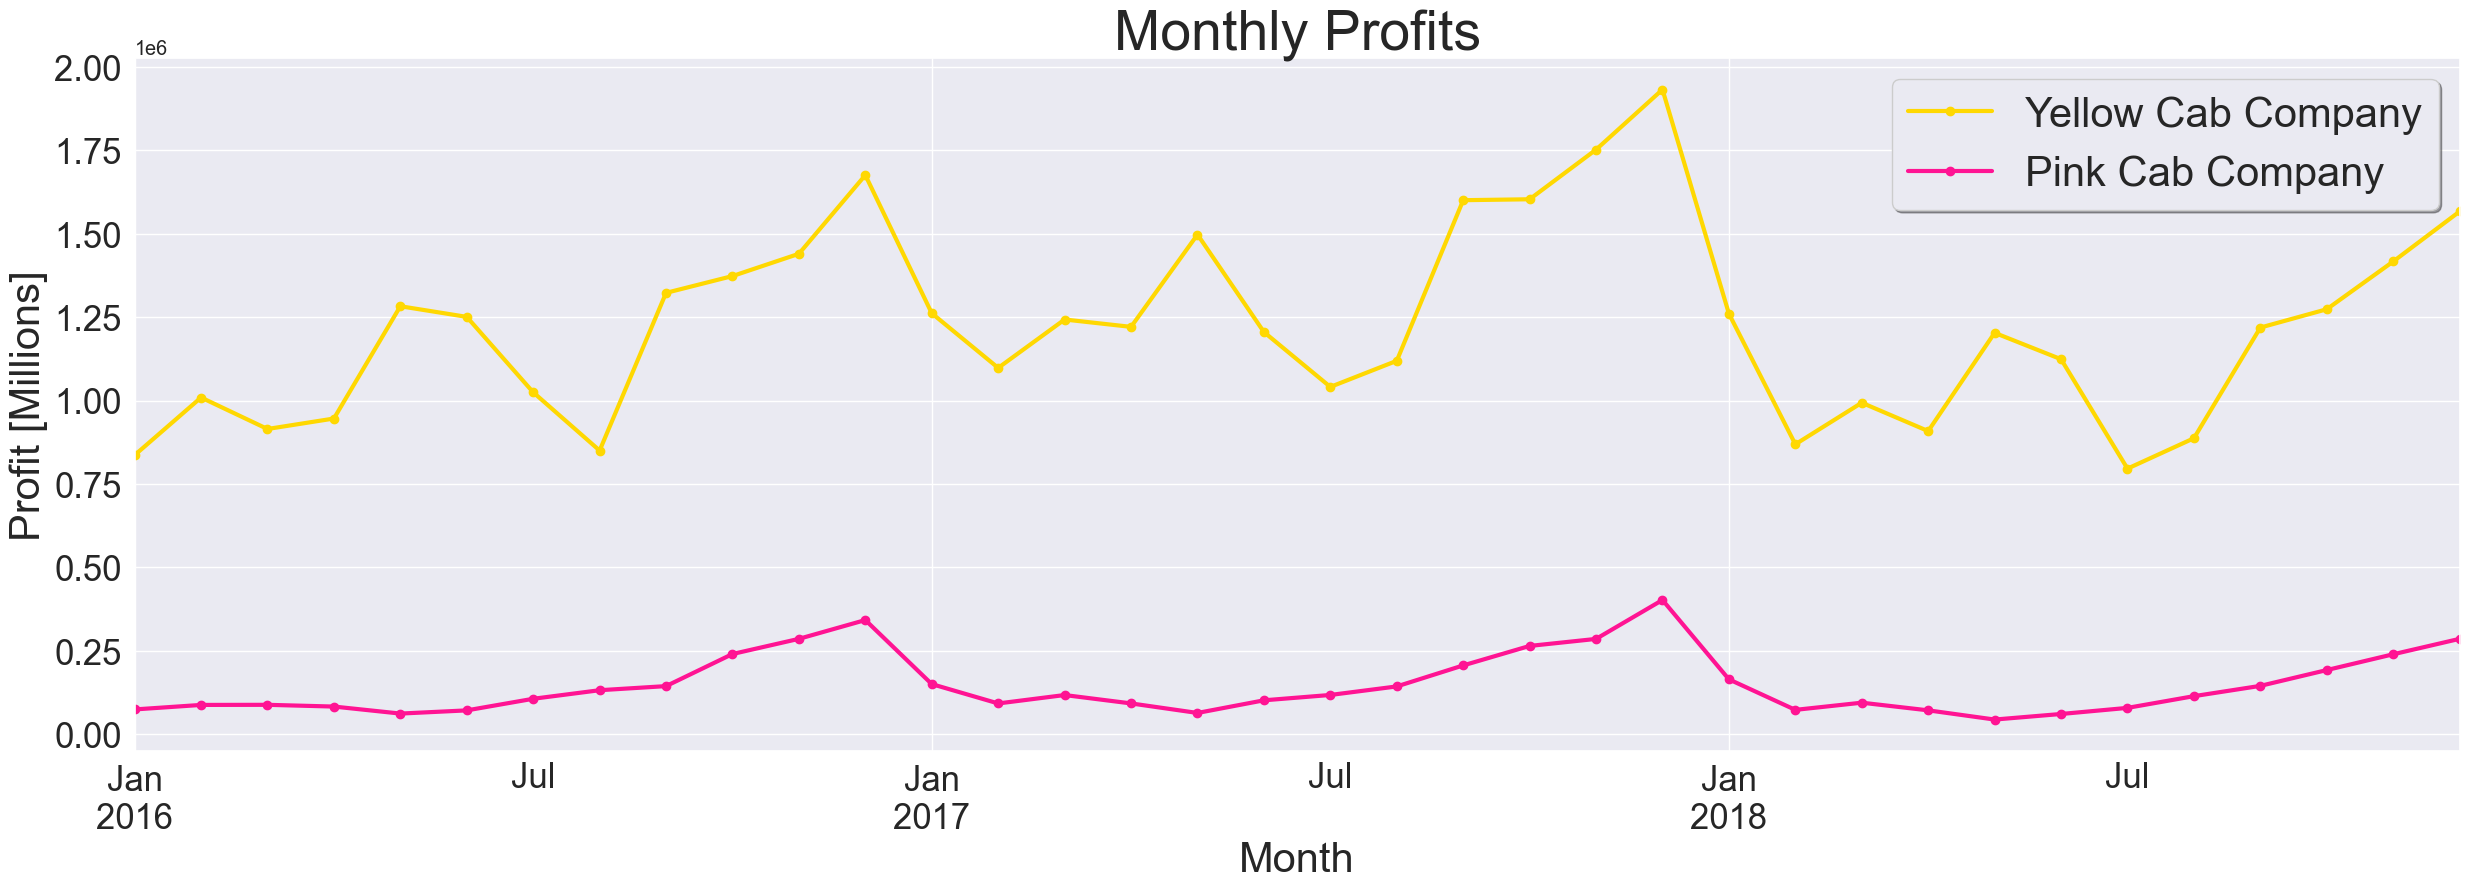

In [340]:
#MONTHLY PROFIT FOR EACH

plt.figure(figsize=(30,9))

fig= yellow_cab_st.Profit.resample('m').sum().plot.line(color = '#FFD801',label='Yellow Cab Company',linewidth=3, marker ='o',fontsize=25)
fig=pink_cab_st.Profit.resample('m').sum().plot.line(color = '#FF1493',label='Pink Cab Company',linewidth=3, marker='o', fontsize=25)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.ylabel('Profit [Millions]',fontsize=30)
plt.title('Monthly Profits',fontsize=40)
plt.xlabel('Month',fontsize=30)
plt.legend(loc='best', shadow=True, fontsize=30)

In [341]:
dpm=master_df.groupby(['Company','Month of Travel'])['Profit'].sum().to_frame('Profit')
dpm=dpm.reset_index(level='Month of Travel')
dpm=dpm.reset_index(level='Company')
dpm.head()

Company  Month of Travel      Profit
0  Pink Cab                1  388054.602
1  Pink Cab                2  252041.309
2  Pink Cab                3  299096.571
3  Pink Cab                4  245818.095
4  Pink Cab                5  168613.914

In [342]:
y=yellow_cab_st.Profit.resample('m').sum().to_frame('Profit')
p=pink_cab_st.Profit.resample('m').sum().to_frame('Profit')

print('The average monthly profit of Yellow Cab Company is ', round(y.Profit.mean(),1),"  and it's std deviation is ",round(y.Profit.std(),2), 'so, the percentage of the deviation is', round((y.Profit.std() /y.Profit.mean())*100,2),'%')
print('The average monthly profit of Pink Cab Company is ', round(p.Profit.mean(),1),"  and it's std deviation is ",round(p.Profit.std(),2), 'so, the percentage of the deviation is', round((p.Profit.std() /p.Profit.mean())*100,2),'%')


The average monthly profit of Yellow Cab Company is  1222788.1   and it's std deviation is  282089.04 so, the percentage of the deviation is 23.07 %
The average monthly profit of Pink Cab Company is  147425.8   and it's std deviation is  90063.97 so, the percentage of the deviation is 61.09 %


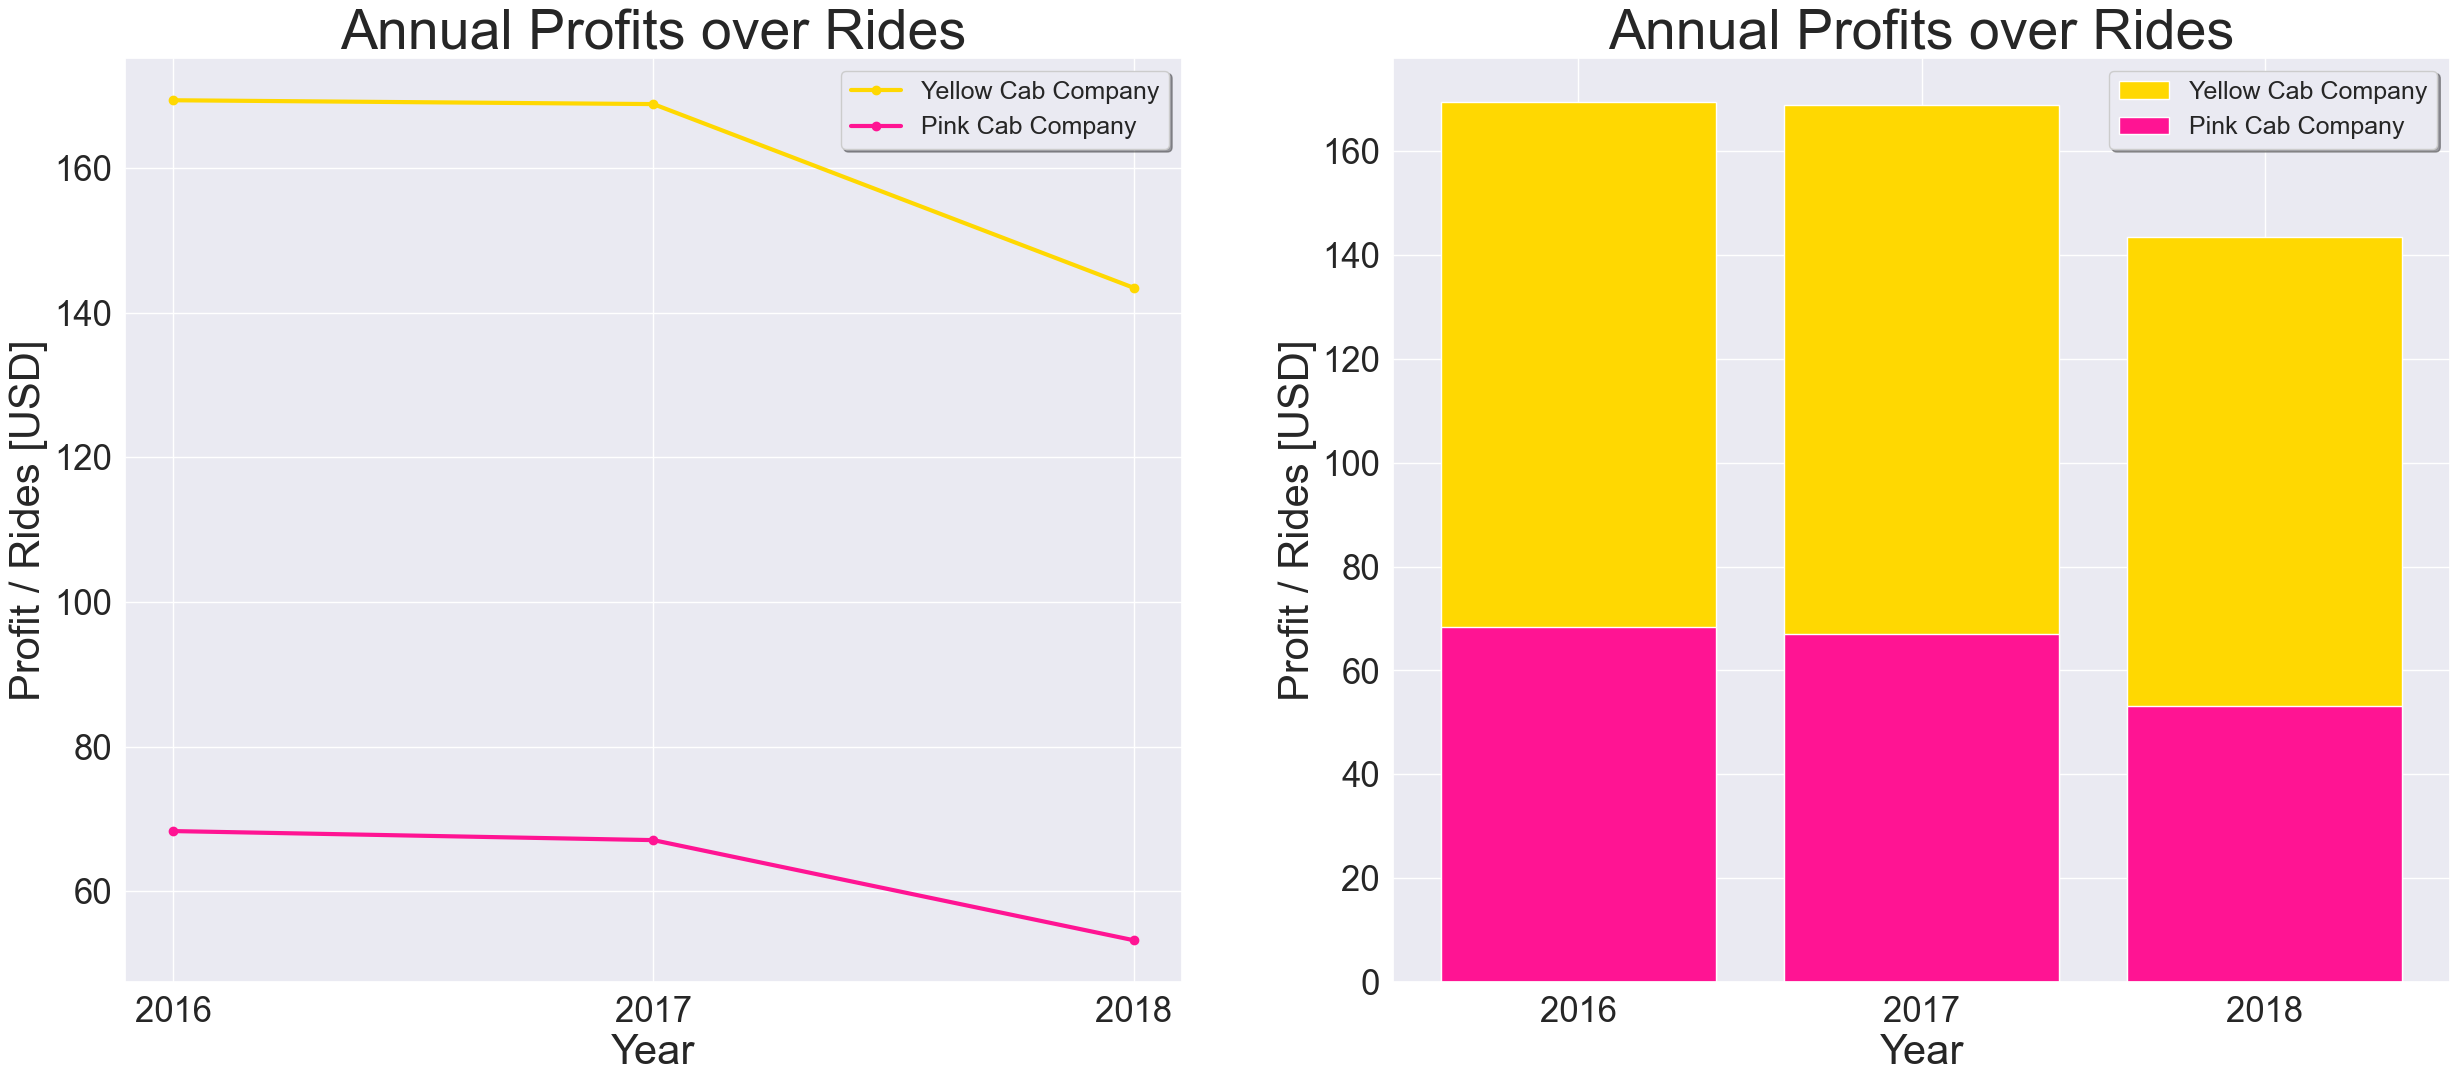

In [343]:
#PROFIT PER RIDE

plt.figure(figsize=(30,12))

plt.subplot(1,2,2)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitORides', data = ypy,color = '#FFD801',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitORides', data = ppy, color = '#FF1493',label='Pink Cab Company')
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.title('Annual Profits over Rides',fontsize=40)
plt.ylabel('Profit / Rides [USD]',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.legend(loc='upper right', shadow=True, fontsize=18)

plt.subplot(1,2,1)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.plot(x1.index.strftime('%Y'),'ProfitORides', data = ypy,color = '#FFD801',label='Yellow Cab Company',linewidth=3, marker = 'o')
plt.plot(x2.index.strftime('%Y'),'ProfitORides', data = ppy, color = '#FF1493',label='Pink Cab Company',linewidth=3, marker='o')
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.title('Annual Profits over Rides',fontsize=40)
plt.ylabel('Profit / Rides [USD]', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.legend(loc='upper right', shadow=True, fontsize=18)

In [344]:
#YEARLY PROFIT IN EACH COMPANY 
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "${:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va, fontsize=3)                      
                                    


# Calling the function 
add_value_labels(ax)

ypy_new = ypy.reset_index(level='Date of Travel')
ypy_new.head()

Date of Travel        Profit  ProfitORides  ProfitOKM
0     2016-12-31  1.392700e+07    169.347821   7.487720
1     2017-12-31  1.657598e+07    168.817057   7.483920
2     2018-12-31  1.351740e+07    143.416122   6.362446

Text(0.5, 17.84444444444445, 'Year')

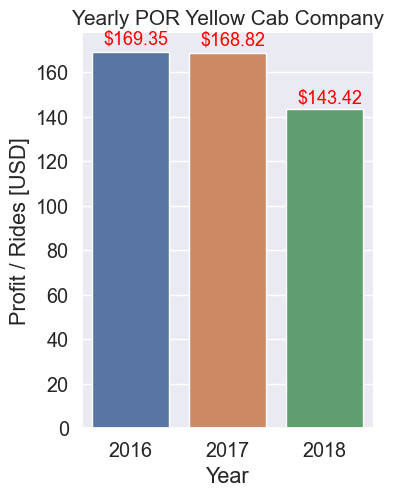

In [345]:
g=sns.catplot(x='Date of Travel',y='ProfitORides',data=ypy_new,kind='bar')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, 
            p.get_height() * 1.02, 
            "${:.2f}".format(p.get_height()), 
            color='red', rotation='horizontal', size='small')
años = ['2016','2017','2018']
mapeado = range(len(años))
plt.xticks(mapeado, años, rotation =0)
plt.title('Yearly POR Yellow Cab Company',fontsize=15)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')

In [346]:
ppy_new = ppy.reset_index('Date of Travel')
ppy_new

Date of Travel       Profit  ProfitORides  ProfitOKM
0     2016-12-31  1713511.224     68.321819   3.040784
1     2017-12-31  2033654.908     67.070839   2.965274
2     2018-12-31  1560162.189     53.229689   2.357667

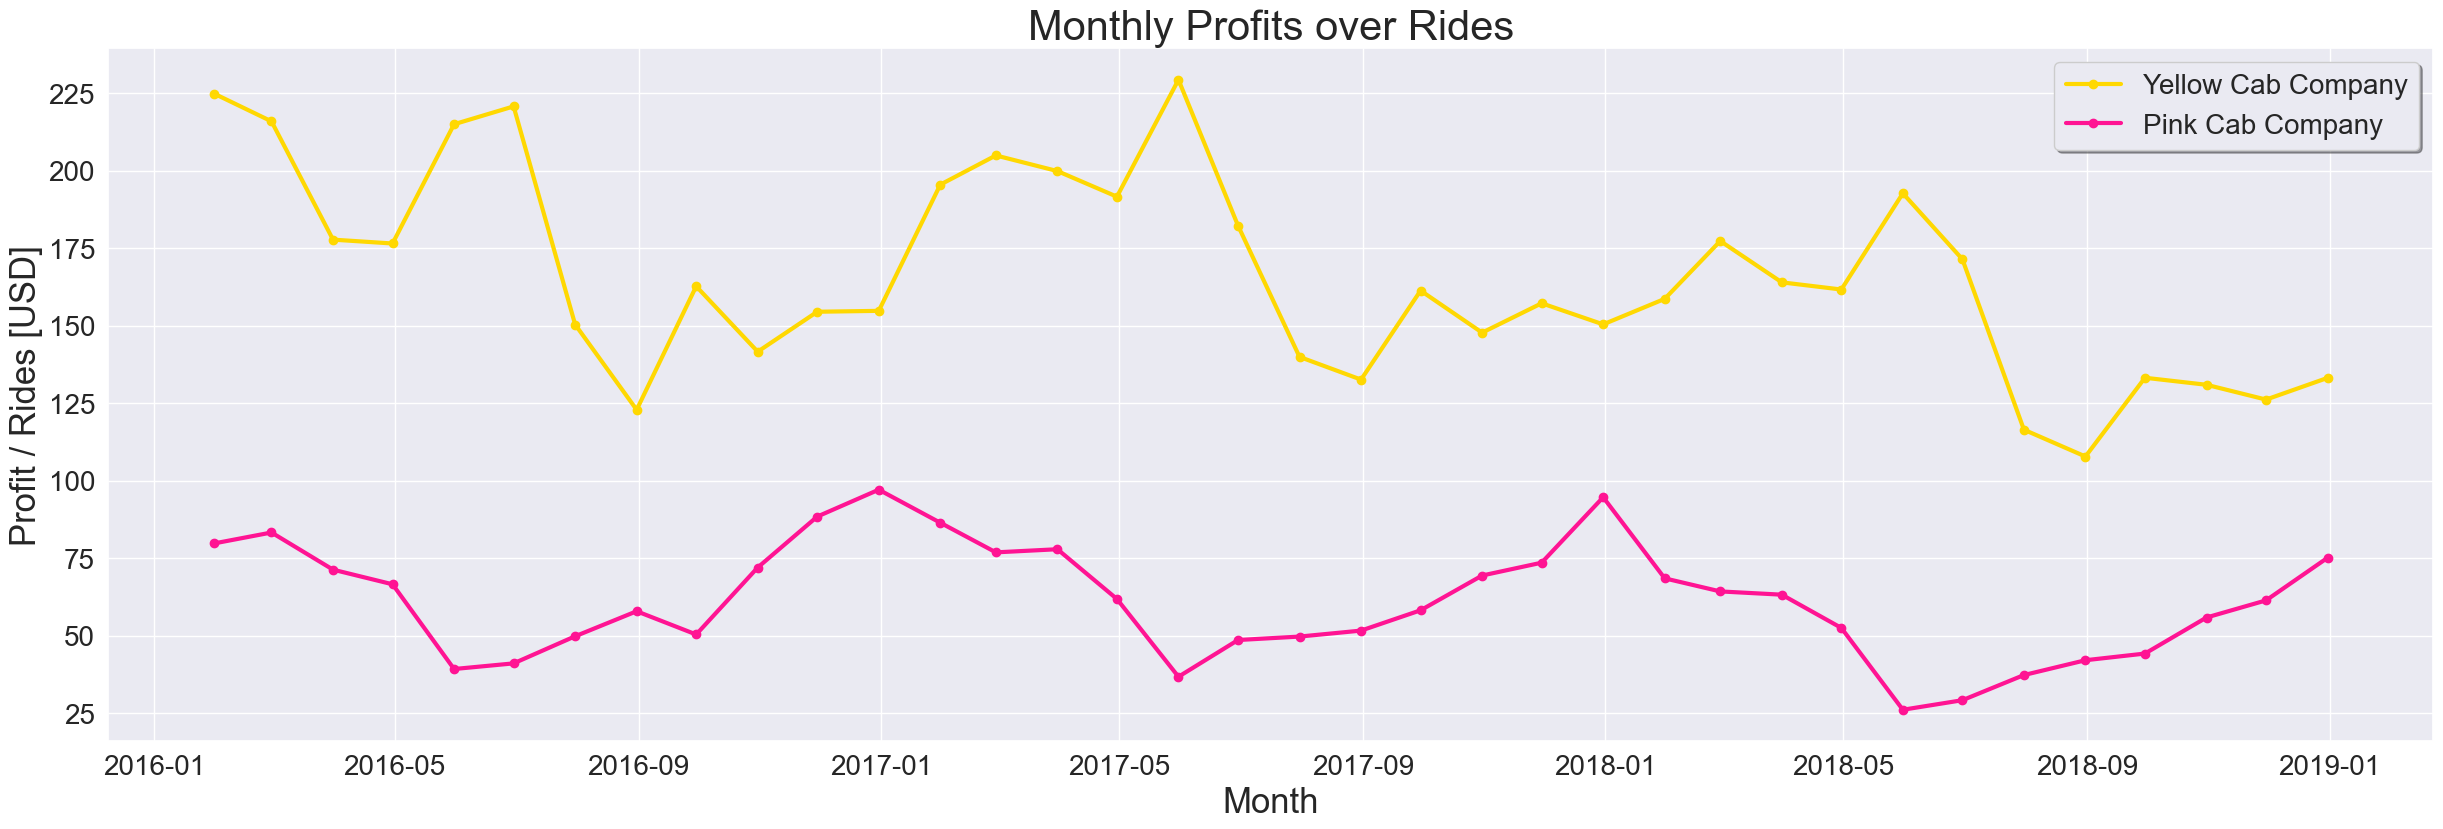

In [347]:
#Monthly profits over Rides

plt.figure(figsize=(30,9))

x1= ypm.ProfitORides.resample('m').sum()
x2= ppm.ProfitORides.resample('m').sum()
plt.plot(x1.index,'ProfitORides', data = ypm,color = '#FFD801', linewidth = 3,label='Yellow Cab Company', marker='o')
plt.plot(x2.index,'ProfitORides', data = ppm, color = '#FF1493',linewidth = 3,label='Pink Cab Company', marker='o')
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.title('Monthly Profits over Rides',fontsize=30)
plt.ylabel('Profit / Rides [USD]',fontsize=25)
plt.xlabel('Month',fontsize=25)
plt.legend(loc='upper right', shadow=True, fontsize=20)

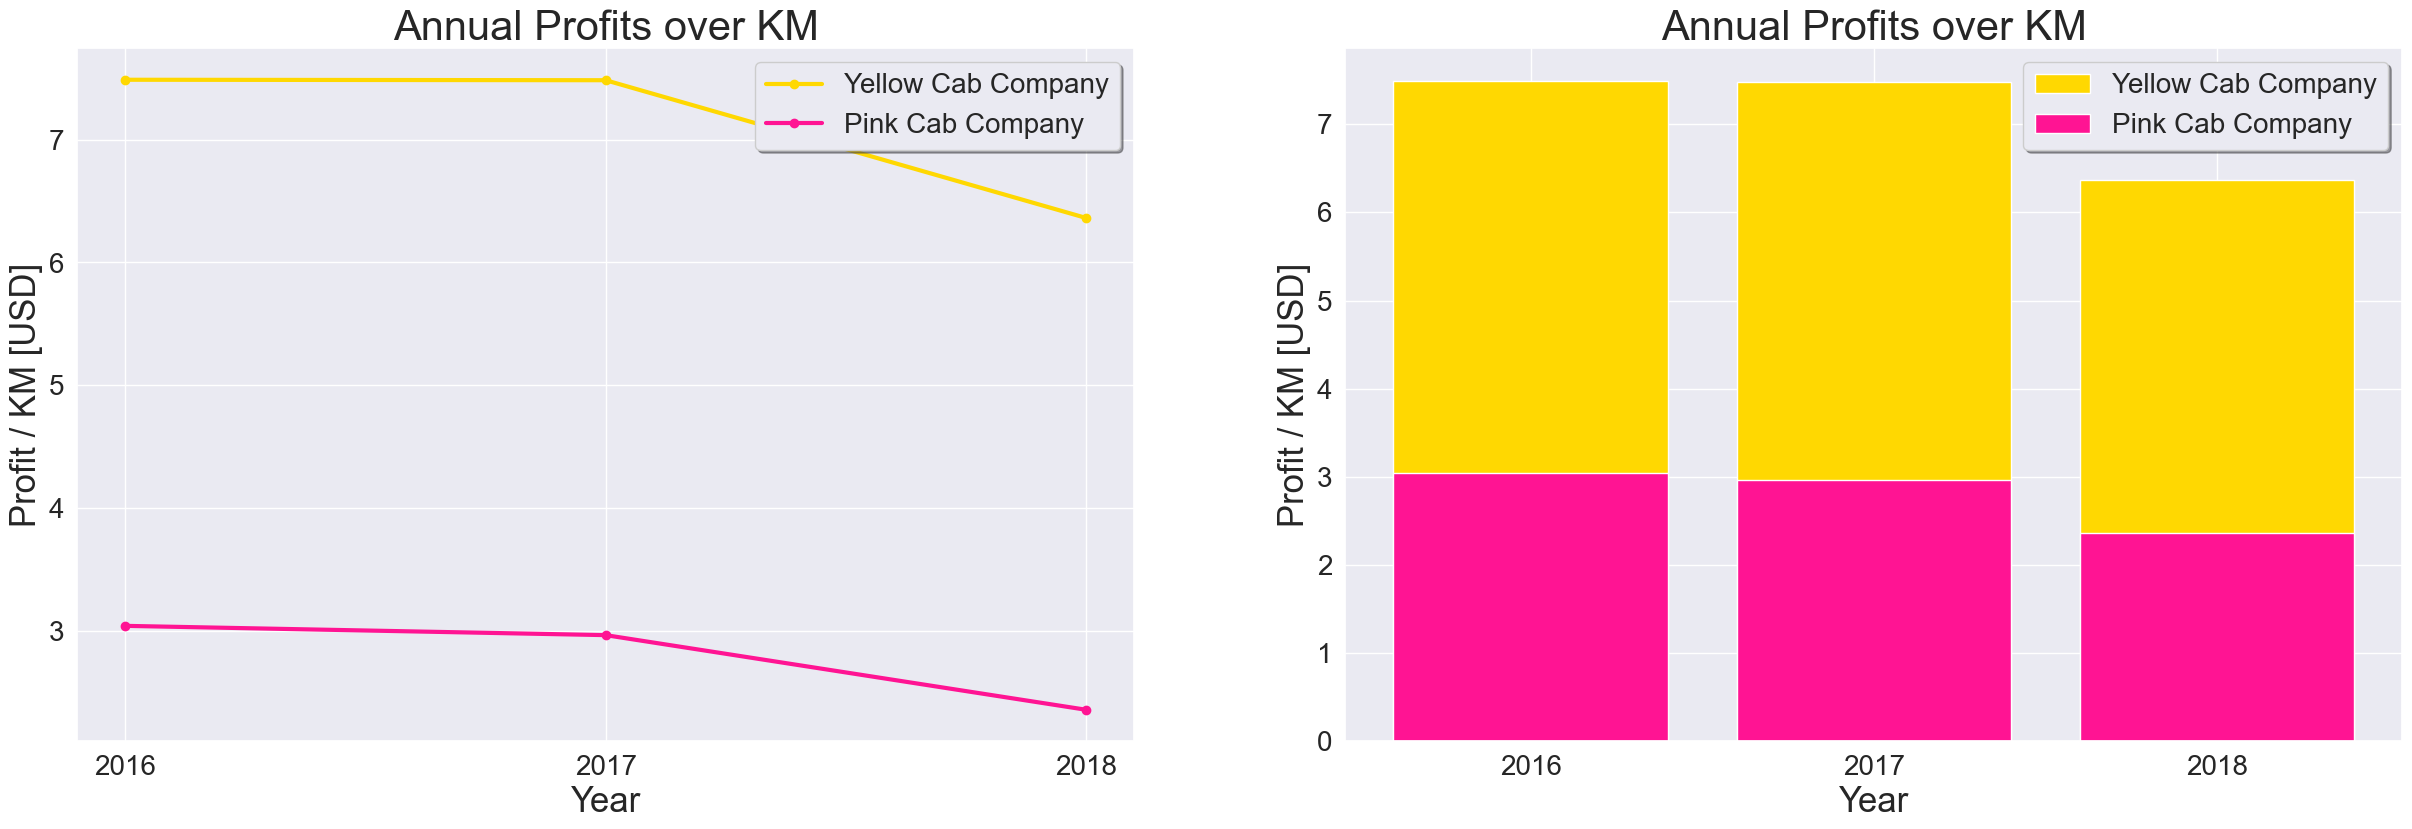

In [348]:
#ANNUAL PROFITS(in KM)

plt.figure(figsize=(30,9))

plt.subplot(1,2,2)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitOKM', data = ypy,color = '#FFD801',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitOKM', data = ppy, color = '#FF1493',label='Pink Cab Company')
plt.xticks(rotation=0,fontsize=20)
plt.title('Annual Profits over KM',fontsize=30)
plt.ylabel('Profit / KM [USD]',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.legend(loc='upper right', shadow=True,fontsize=20)

plt.subplot(1,2,1)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.ylabel('Profit / KM [USD]', fontsize=20)
plt.plot(x1.index.strftime('%Y'),'ProfitOKM', data = ypy,color = '#FFD801',label='Yellow Cab Company',linewidth=3,marker='o')
plt.plot(x2.index.strftime('%Y'),'ProfitOKM', data = ppy, color = '#FF1493',label='Pink Cab Company',linewidth=3,marker='o')
plt.title('Annual Profits over KM',fontsize=30)
plt.ylabel('Profit / KM [USD]',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.legend(loc='upper right', shadow=True,fontsize=20)

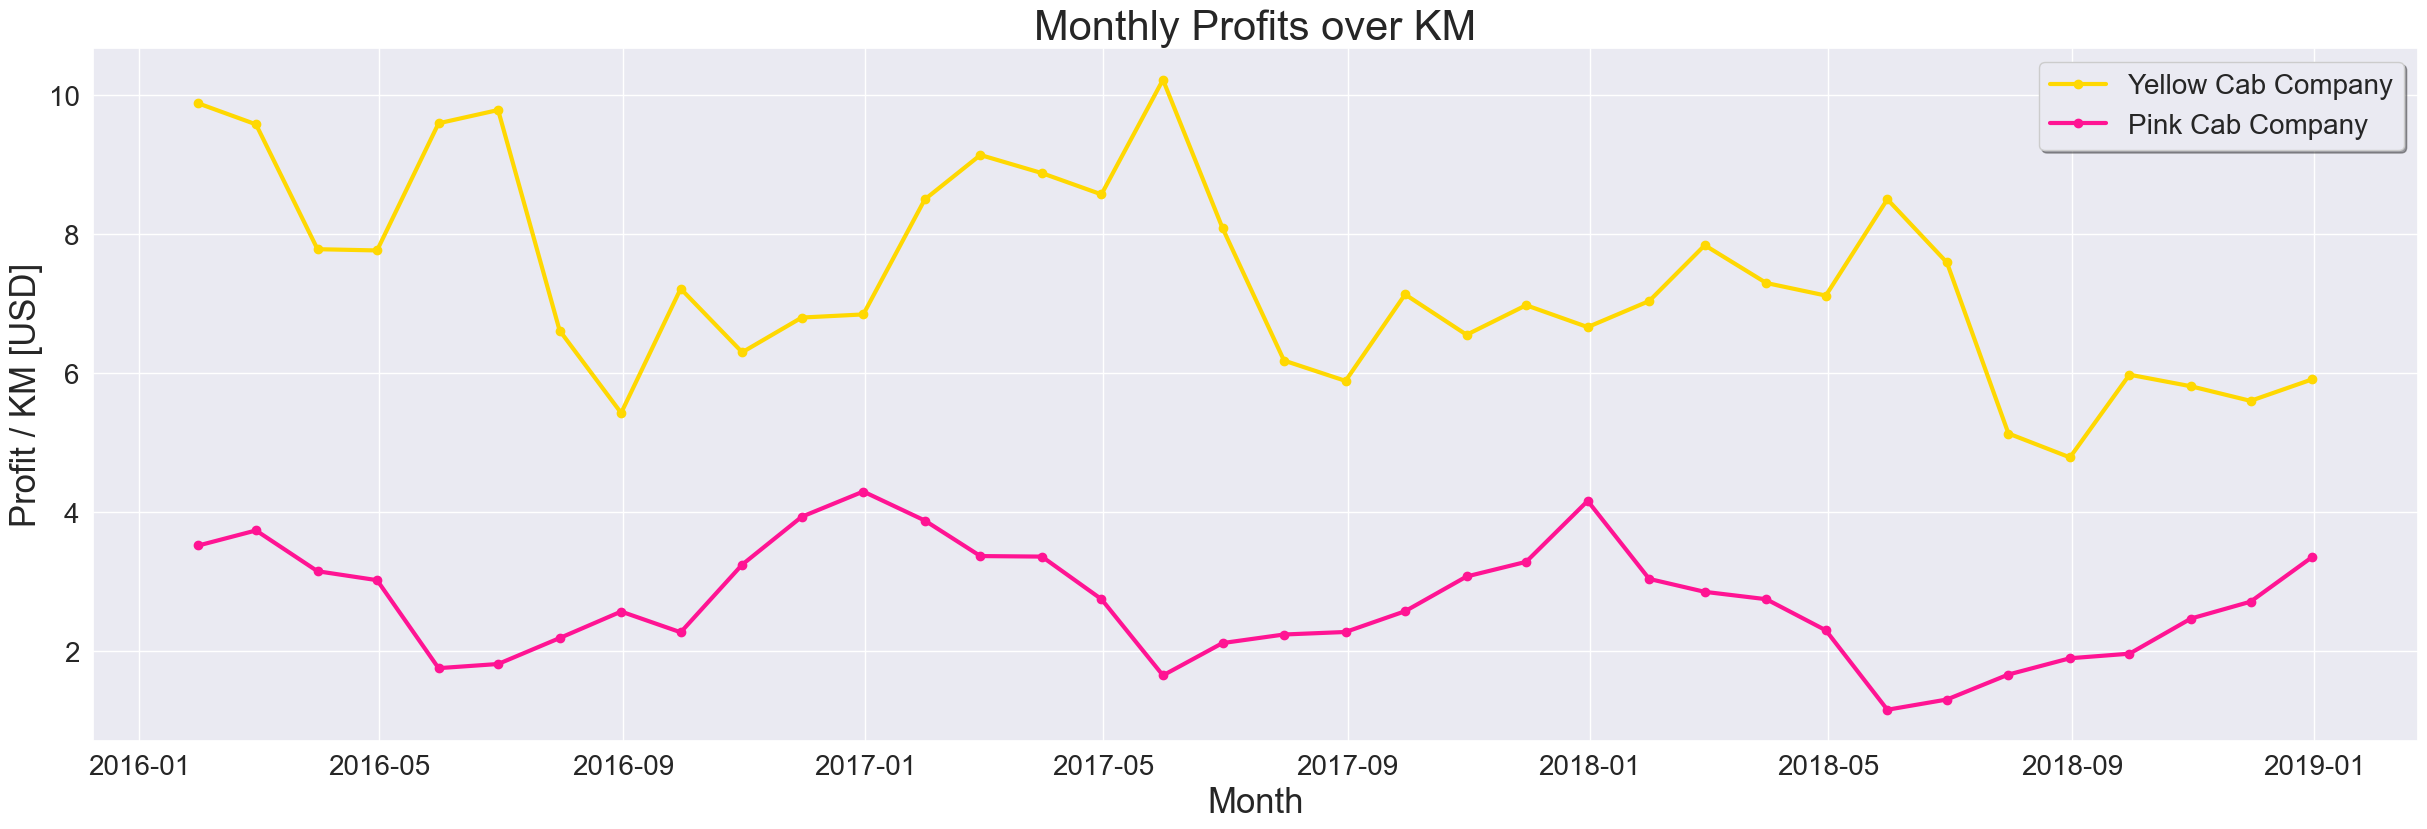

In [349]:
#MONTHLY PROFITS(in KM)

plt.figure(figsize=(30,9))

x1= ypm.ProfitOKM.resample('m').sum()
x2= ppm.ProfitOKM.resample('m').sum()
plt.ylabel('Profit / KM [USD]', fontsize=25)
plt.plot(x1.index,'ProfitOKM', data = ypm,color = '#FFD801',label='Yellow Cab Company',linewidth=3, marker='o')
plt.plot(x2.index,'ProfitOKM', data = ppm, color = '#FF1493',label='Pink Cab Company',linewidth=3,marker='o')
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.title('Monthly Profits over KM',fontsize=30)
plt.ylabel('Profit / KM [USD]',fontsize=25)
plt.xlabel('Month',fontsize=25)
plt.legend(loc='upper right', shadow=True,fontsize=20)

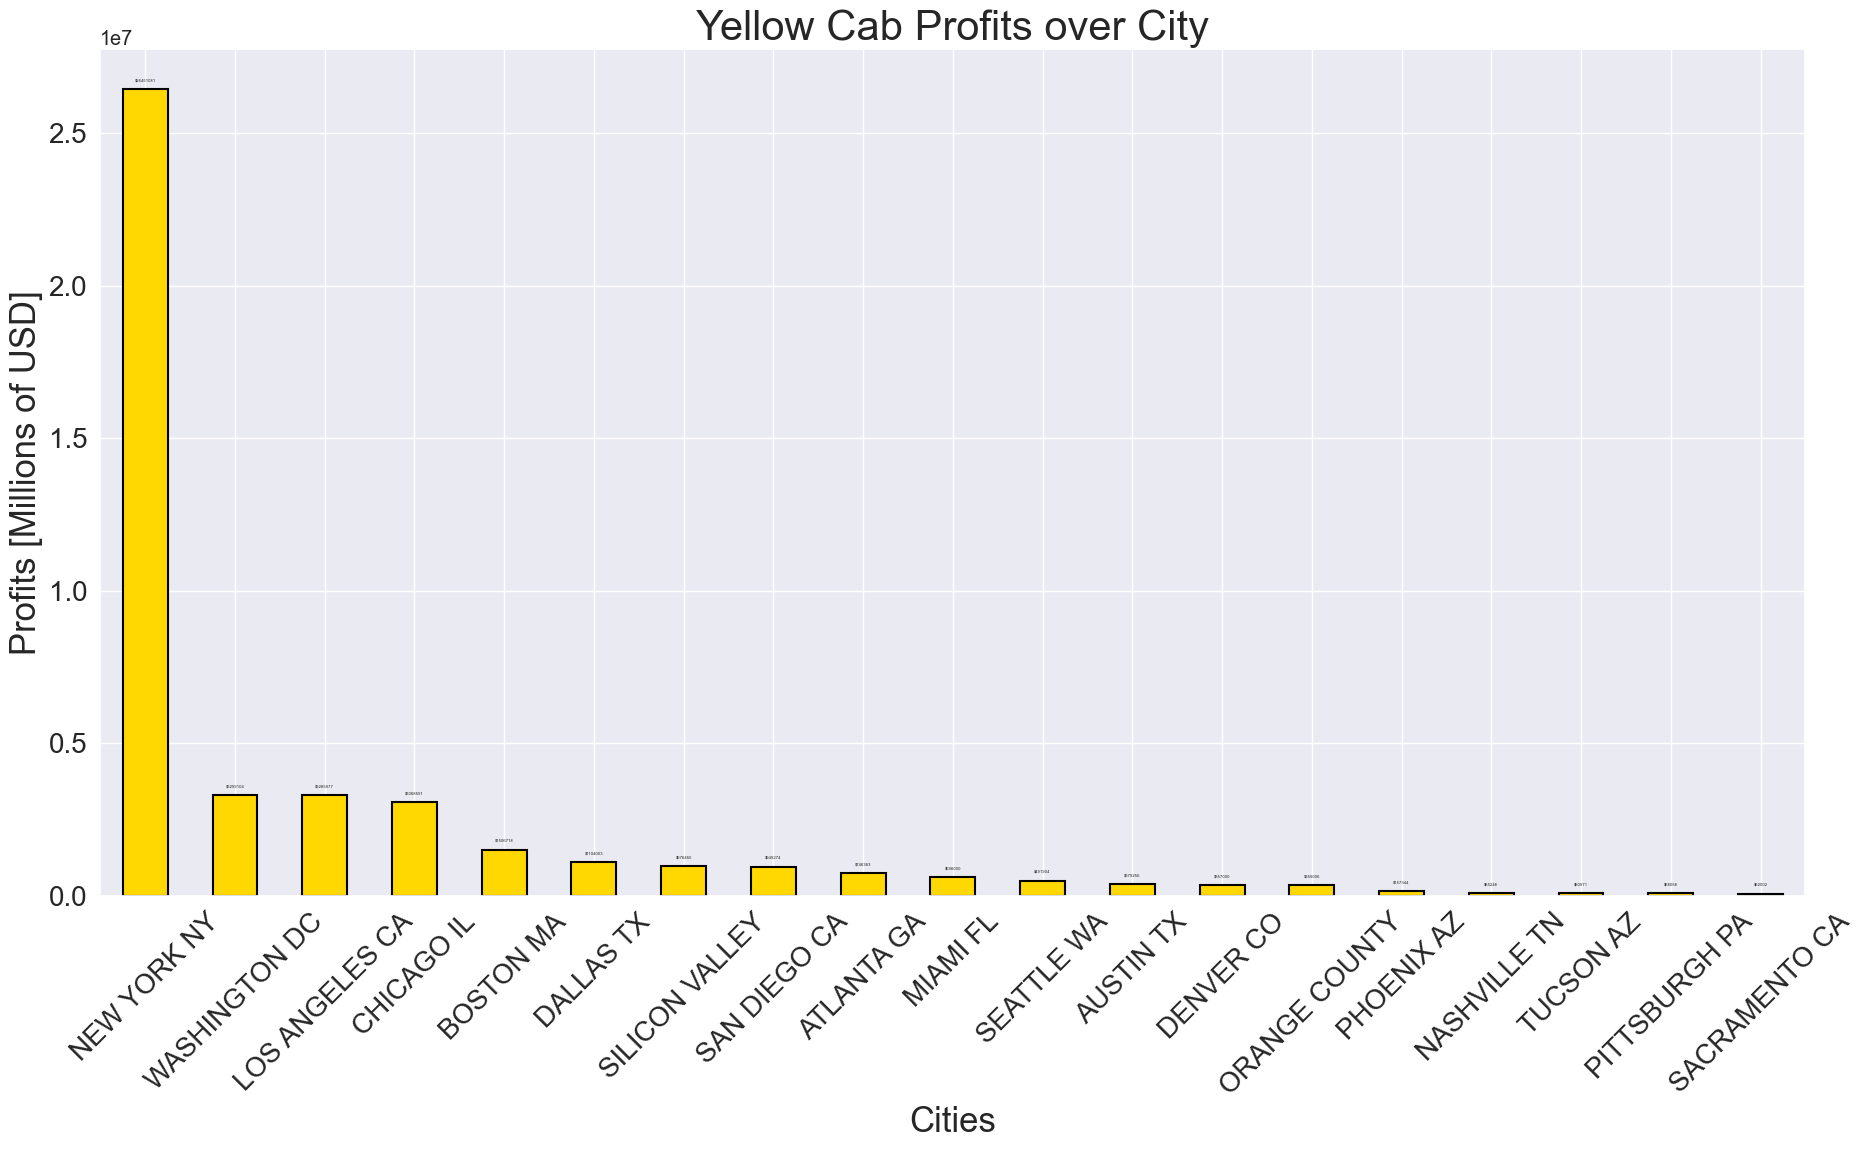

In [350]:
#AVERAGE PROFITS PER CITY
ppc= yellow_cab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = '#FFD801',edgecolor='black',linewidth=1.5)

plt.xticks(rotation=45,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Yellow Cab Profits over City',fontsize=30)
add_value_labels(fig)

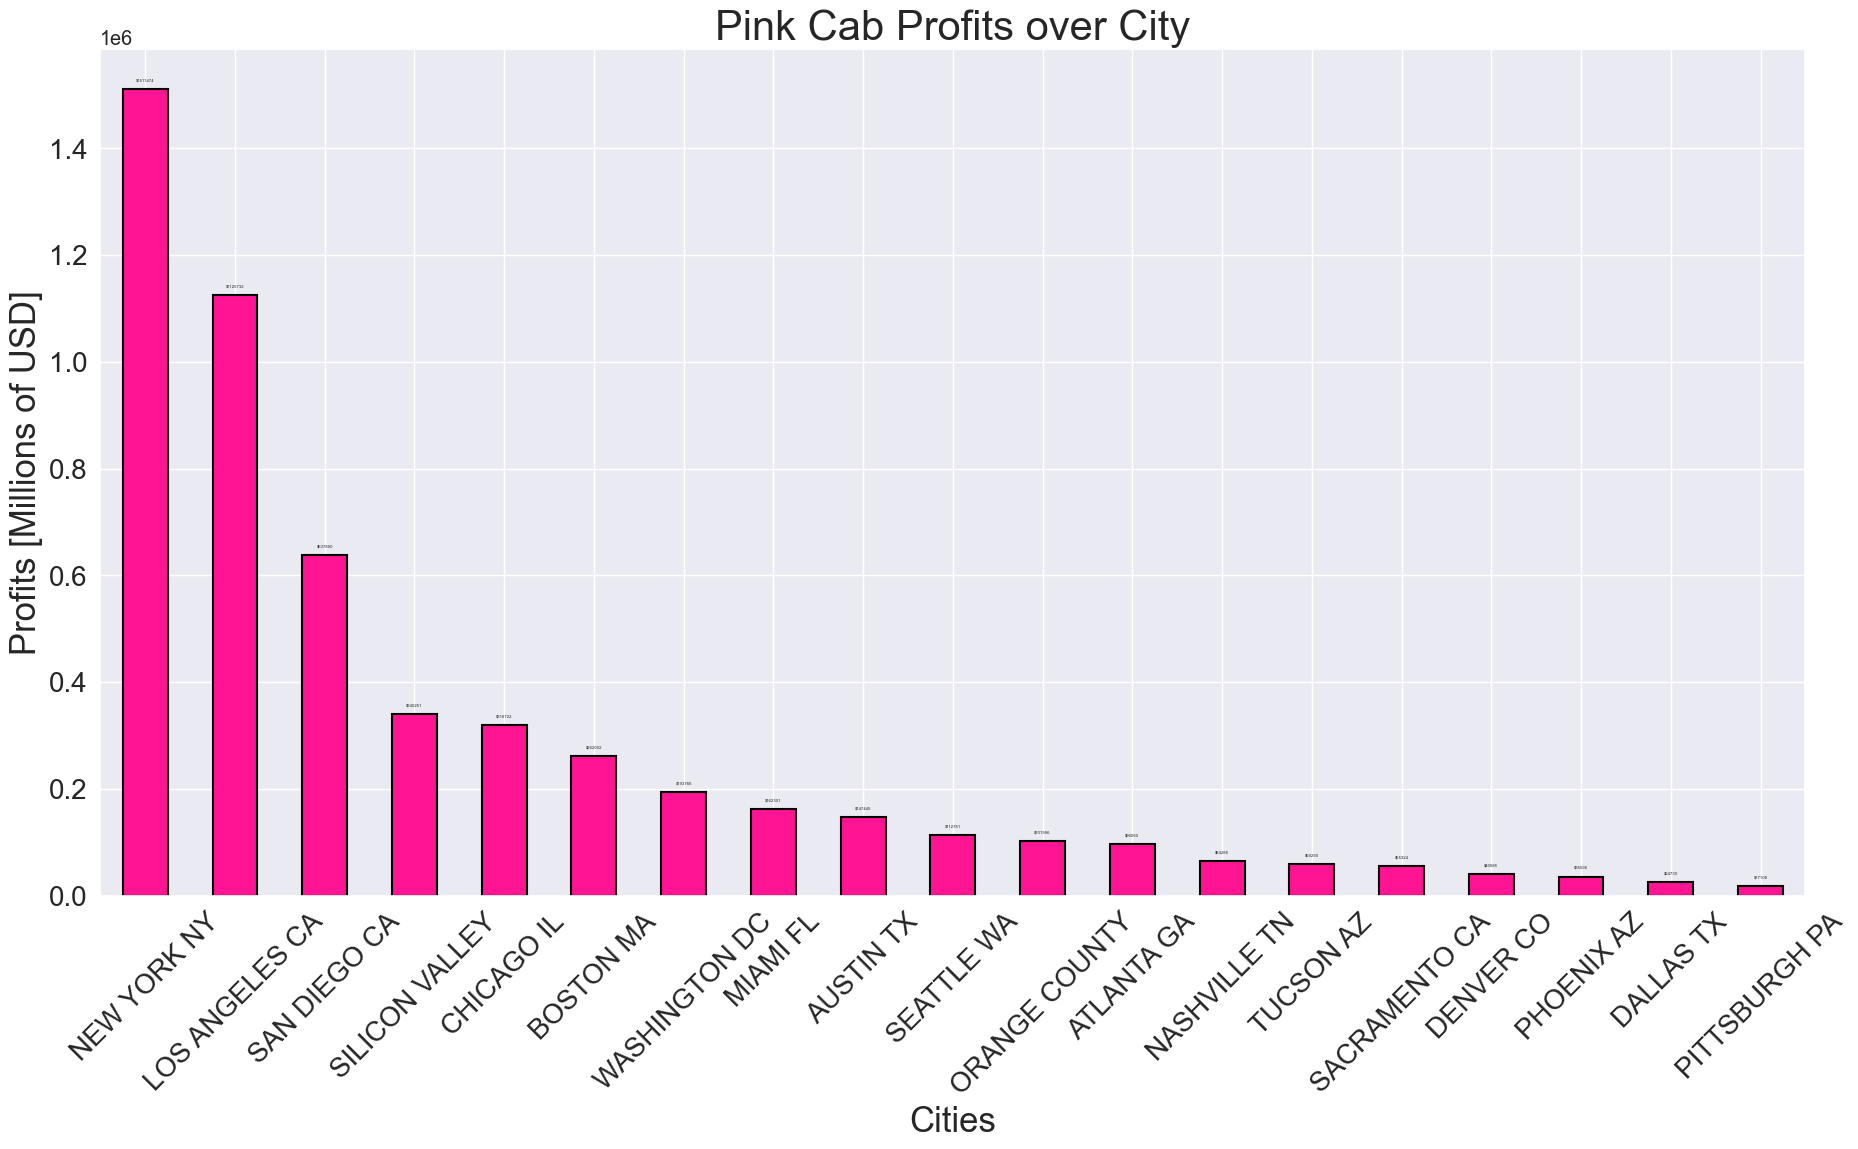

In [351]:
ppc= pink_cab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = '#FF1493',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Pink Cab Profits over City',fontsize=30)
add_value_labels(fig)

In [352]:
h=master_df.groupby(['Company','City']).Profit.sum().to_frame('Profit Over City')
h=h.reset_index(level='City', col_level=1)
h=h.reset_index(level='Company', col_level=1)
h = h.sort_values(by='Profit Over City', ascending= False )

h=h.drop([28,9],axis=0)
h.head()

Company            City  Profit Over City
37  Yellow Cab   WASHINGTON DC      3.299104e+06
25  Yellow Cab  LOS ANGELES CA      3.285977e+06
22  Yellow Cab      CHICAGO IL      3.068591e+06
21  Yellow Cab       BOSTON MA      1.506718e+06
6     Pink Cab  LOS ANGELES CA      1.125732e+06

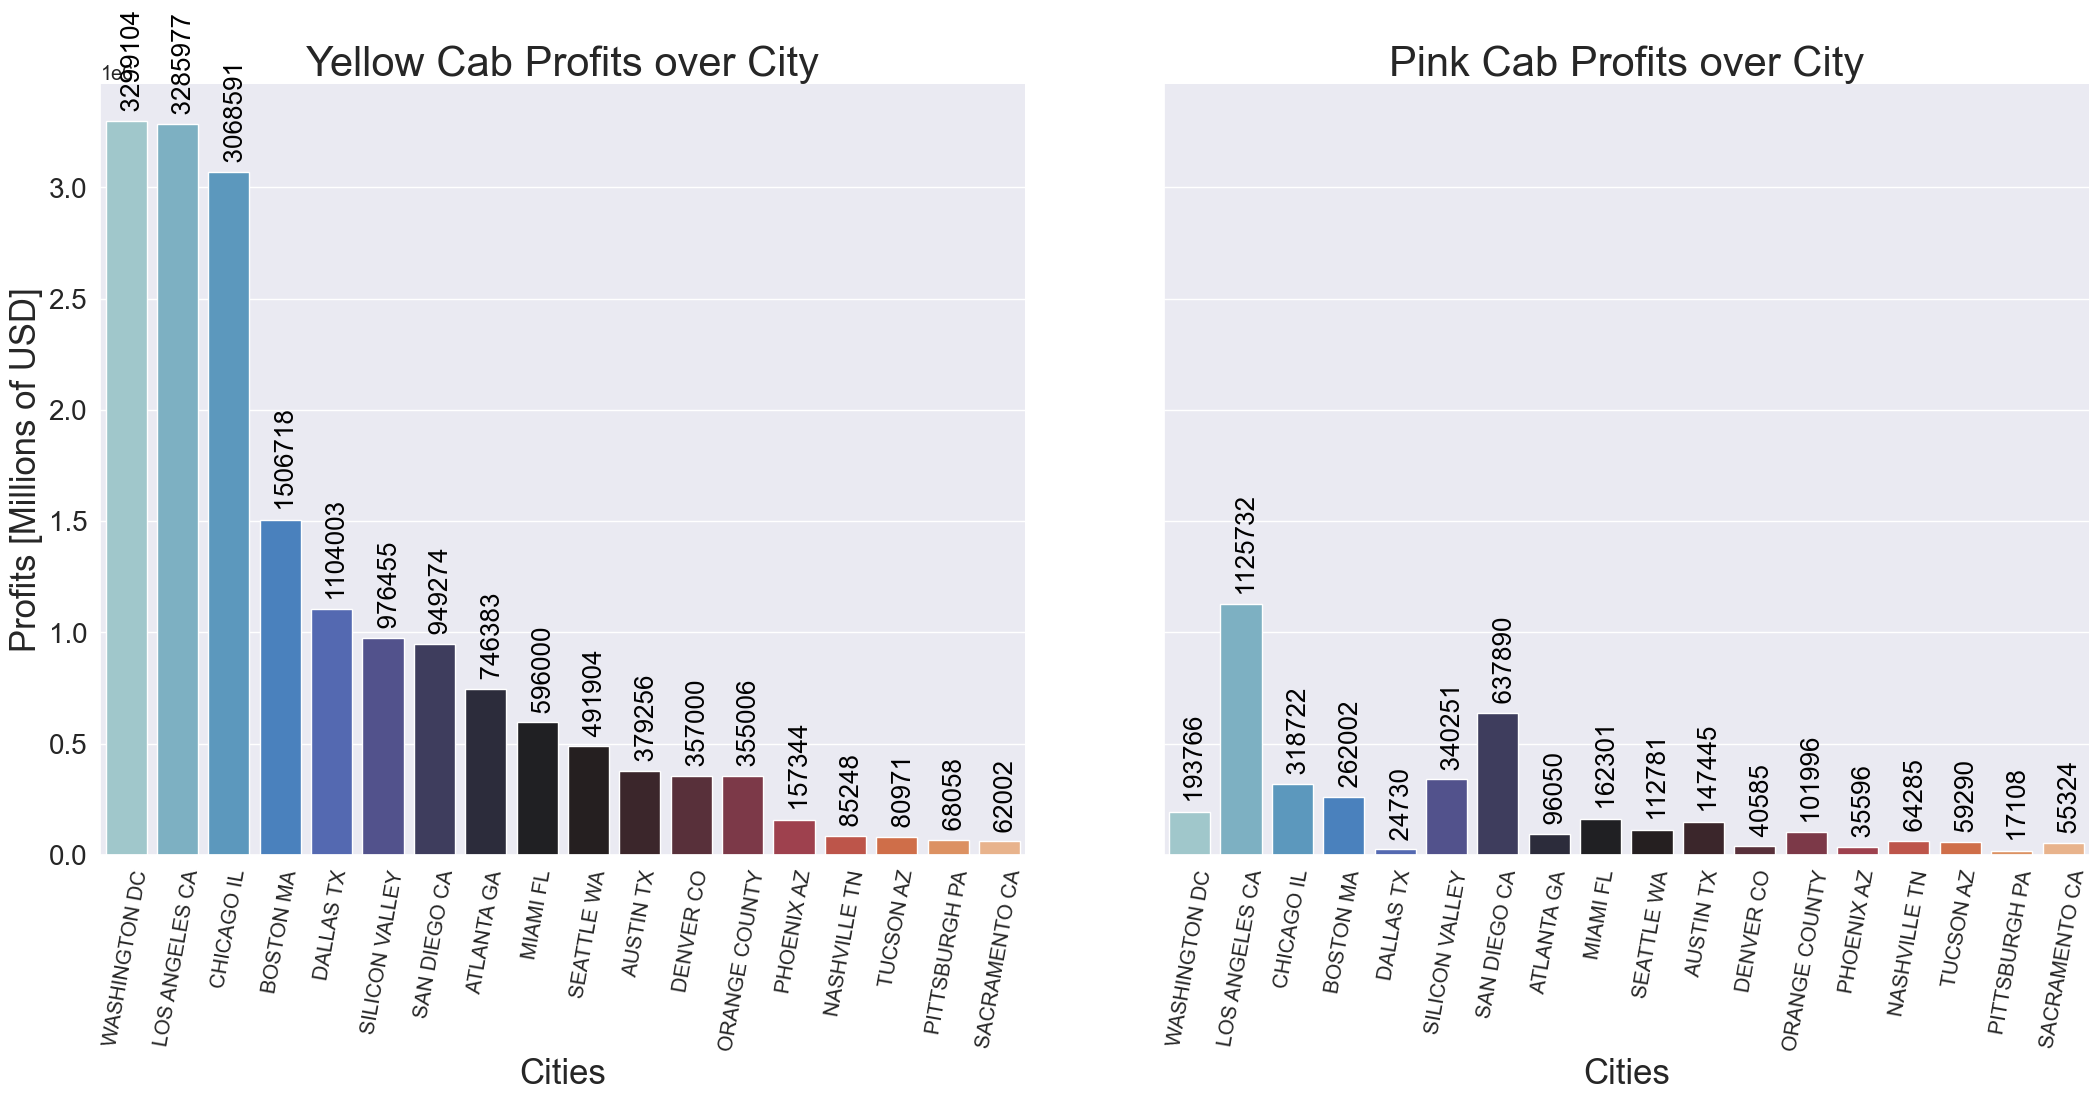

In [353]:
g=sns.catplot(x='City',y='Profit Over City',data=h,kind='bar',palette = 'icefire',col='Company', height=9, aspect=1.2)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.3, 
            p.get_height(), 
            "  {:.0f}".format(p.get_height()), 
            color='black', rotation='vertical', size='large')
plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Yellow Cab Profits over City',fontsize=30)
plt.xticks(rotation=80,fontsize=15)
plt.yticks(rotation=0,fontsize=20)
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.3, 
            p.get_height(), 
            "  {:.0f}".format(p.get_height()), 
            color='black', rotation='vertical', size='large')
plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Pink Cab Profits over City',fontsize=30)
plt.xticks(rotation=80,fontsize=15)
plt.yticks(rotation=0,fontsize=20)
plt.show()

In [354]:
#CITYWISE PROFITS (percentage)

yellow_rides = pd.DataFrame(yellow_cab['City'])
yellow_rides['is_profitable'] = pd.DataFrame(yellow_cab['Profit']>0)
yellow_rides = yellow_rides.groupby(['City','is_profitable']).size().to_frame()
yellow_rides = yellow_rides.rename(columns = {0:'count'})
yellow_rides = yellow_rides.pivot_table('count', ['City'], 'is_profitable')

yellow_rides = yellow_rides.fillna(0)

yellow_rides['profitability_%'] = round(((yellow_rides[True]/(yellow_rides[True]+yellow_rides[False]))*100),2)
yellow_rides = yellow_rides.reset_index(level='City', col_level=1)
yellow_rides = yellow_rides.rename_axis(None, axis=1)
yellow_rides = yellow_rides.sort_values(by='profitability_%', ascending= False)

#list(yellow_rides.columns)
yellow_rides

yellow_rides_i = yellow_rides.set_index('City')
yellow_rides_i

False     True  profitability_%
City                                            
NEW YORK NY        0.0  85918.0           100.00
SILICON VALLEY     0.0   4722.0           100.00
DALLAS TX          1.0   5636.0            99.98
DENVER CO         31.0   2400.0            98.72
MIAMI FL          65.0   4387.0            98.54
ATLANTA GA        86.0   5709.0            98.52
LOS ANGELES CA   663.0  27505.0            97.65
PHOENIX AZ        30.0   1170.0            97.50
ORANGE COUNTY     63.0   2406.0            97.45
AUSTIN TX         91.0   2937.0            96.99
SAN DIEGO CA     342.0   9474.0            96.52
SEATTLE WA       252.0   5013.0            95.21
WASHINGTON DC   2773.0  37272.0            93.08
PITTSBURGH PA     67.0    564.0            89.38
CHICAGO IL      5693.0  41571.0            87.95
NASHVILLE TN     143.0   1026.0            87.77
BOSTON MA       3014.0  21492.0            87.70
TUCSON AZ        169.0    963.0            85.07
SACRAMENTO CA    209.0    824.0            79.77

In [355]:
pink_rides = pd.DataFrame(pink_cab['City'])
pink_rides['is_profitable'] = pd.DataFrame(pink_cab['Profit']>0)
pink_rides = pink_rides.groupby(['City','is_profitable']).size().to_frame()
pink_rides = pink_rides.rename(columns = {0:'count'})
pink_rides = pink_rides.pivot_table('count', ['City'], 'is_profitable')

pink_rides = pink_rides.fillna(0)
pink_rides['profitability_%'] = round(((pink_rides[True]/(pink_rides[True]+pink_rides[False]))*100),2)
pink_rides = pink_rides.reset_index(level='City', col_level=1)
pink_rides = pink_rides.rename_axis(None, axis=1)
pink_rides = pink_rides.sort_values(by='profitability_%', ascending= False )

#list(pink_rides.columns)
pink_rides

pink_rides_i = pink_rides.set_index('City')
pink_rides_i

False   True  profitability_%
City                                         
SILICON VALLEY    117   3680            96.92
NEW YORK NY       454  13513            96.75
AUSTIN TX         149   1719            92.02
SAN DIEGO CA      923   9749            91.35
ORANGE COUNTY     167   1346            88.96
WASHINGTON DC     429   3263            88.38
LOS ANGELES CA   2365  17500            88.09
TUCSON AZ         108    691            86.48
MIAMI FL          273   1729            86.36
BOSTON MA         734   4452            85.85
ATLANTA GA        277   1485            84.28
SEATTLE WA        574   2158            78.99
SACRAMENTO CA     308   1026            76.91
CHICAGO IL       2206   7155            76.43
PHOENIX AZ        219    645            74.65
NASHVILLE TN      550   1291            70.12
DENVER CO         468    926            66.43
DALLAS TX         541    839            60.80
PITTSBURGH PA     269    413            60.56

Text(0.5, 0, 'Cities')

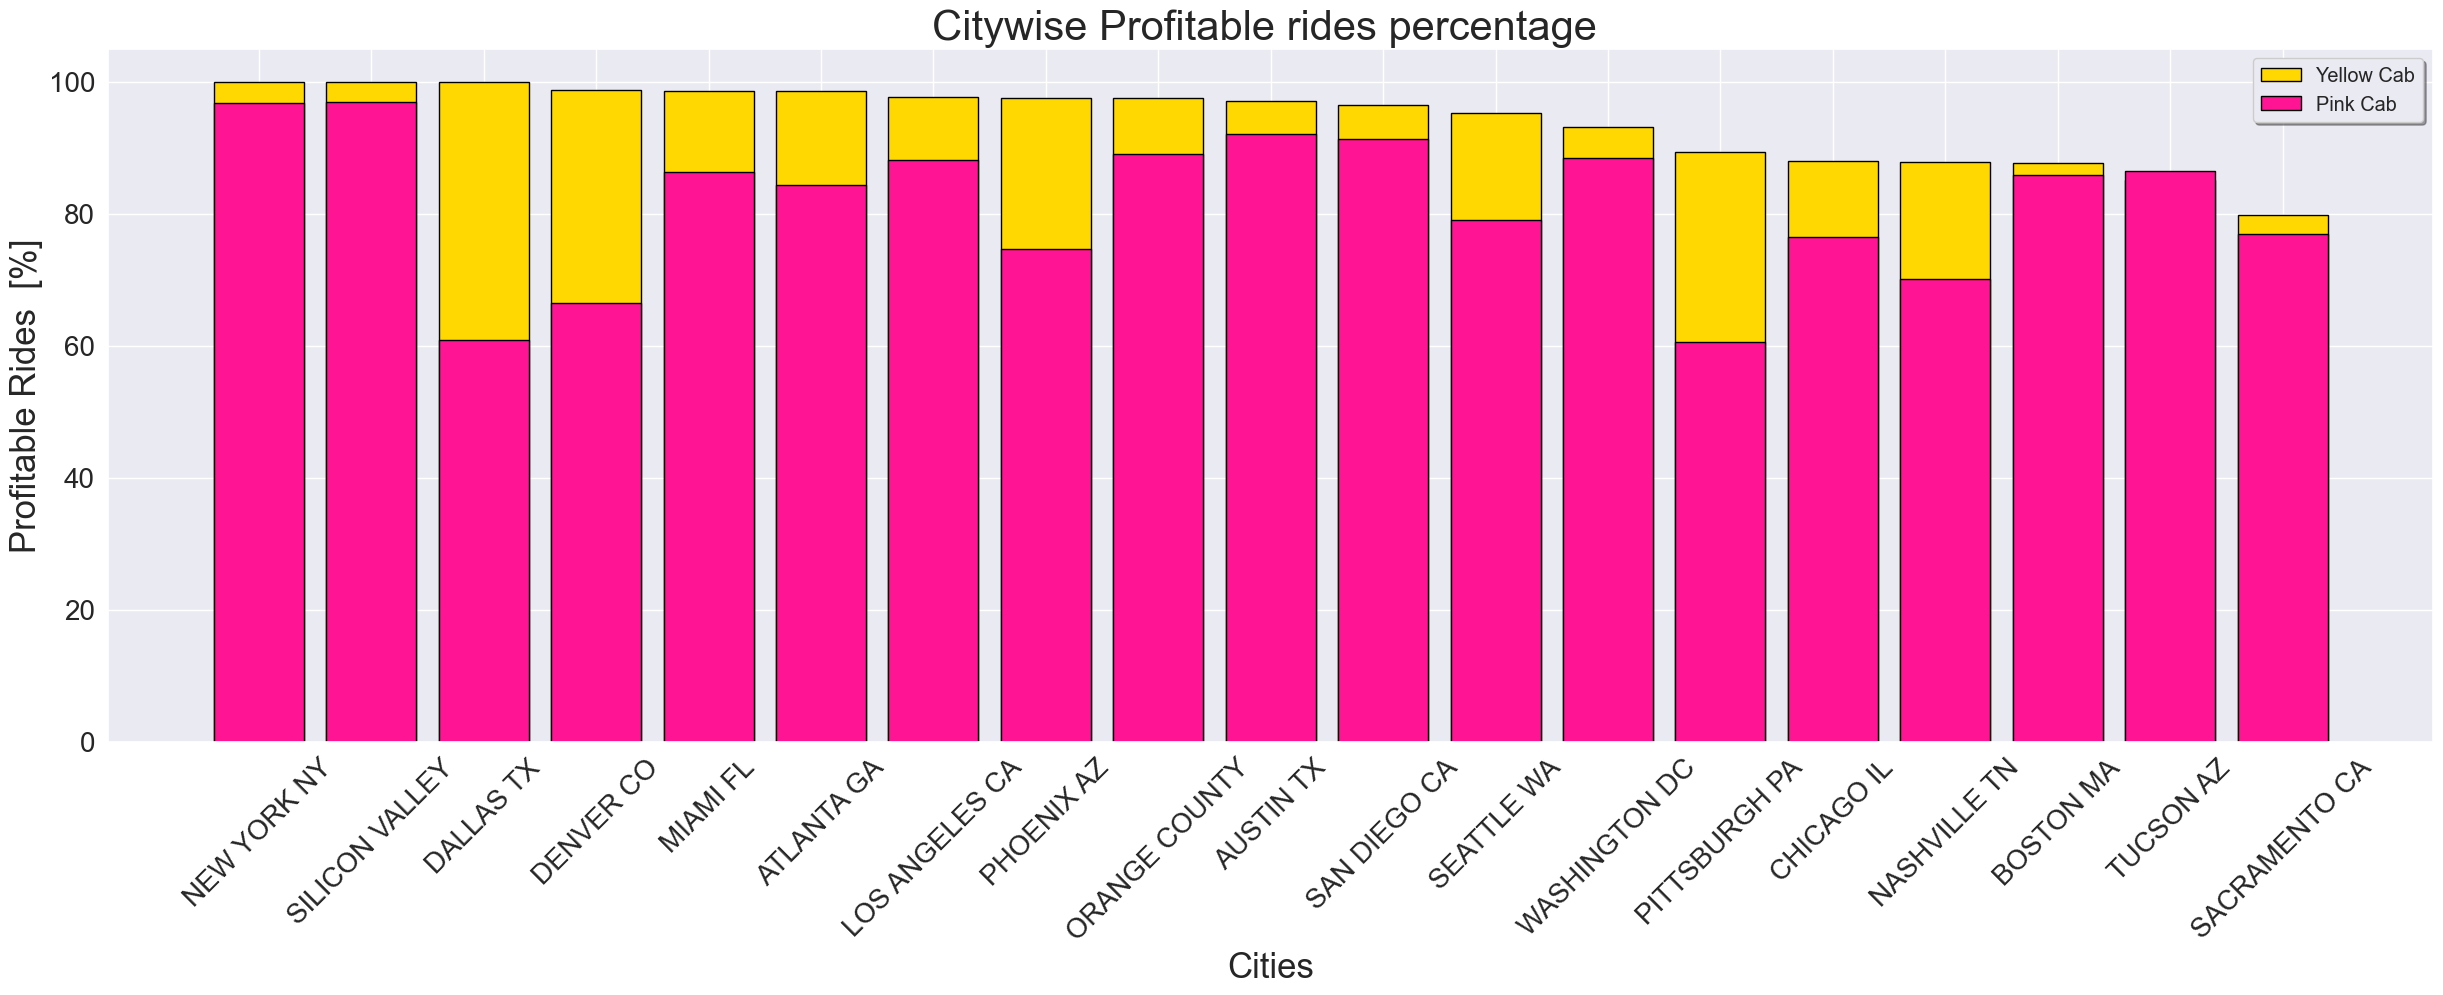

In [356]:
plt.figure(figsize=(30,9))
plt.bar(x= yellow_rides_i.index, height='profitability_%', data = yellow_rides_i,edgecolor = 'black',color = '#FFD801',linewidth=1,label='Yellow Cab')
plt.bar(x= pink_rides_i.index, height='profitability_%', data = pink_rides_i,edgecolor = 'black',color = '#FF1493',linewidth=1,label='Pink Cab')
plt.xticks(rotation=45,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.ylabel('Profitable Rides  [%]', fontsize=25)
plt.title('Citywise Profitable rides percentage ', fontsize = 30)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=25)

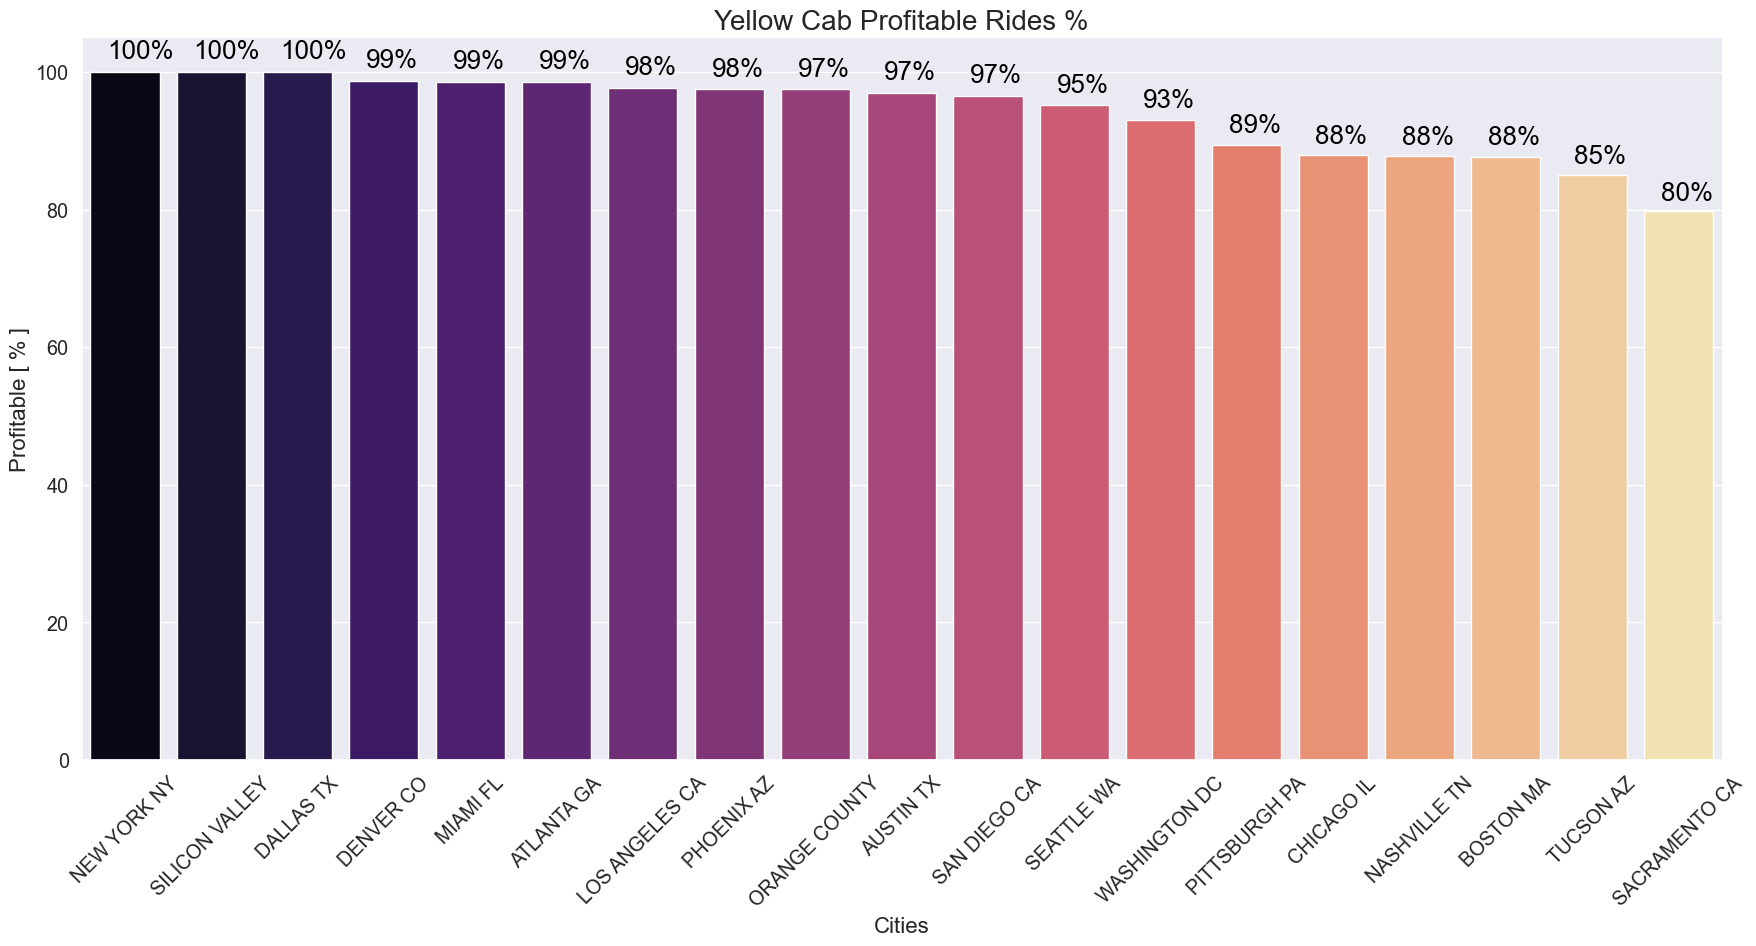

In [357]:
g=sns.catplot(x='City',y='profitability_%',data=yellow_rides,kind='bar',palette = 'magma', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profitable Rides %',fontsize=20)
plt.xticks(rotation=45)

plt.show()

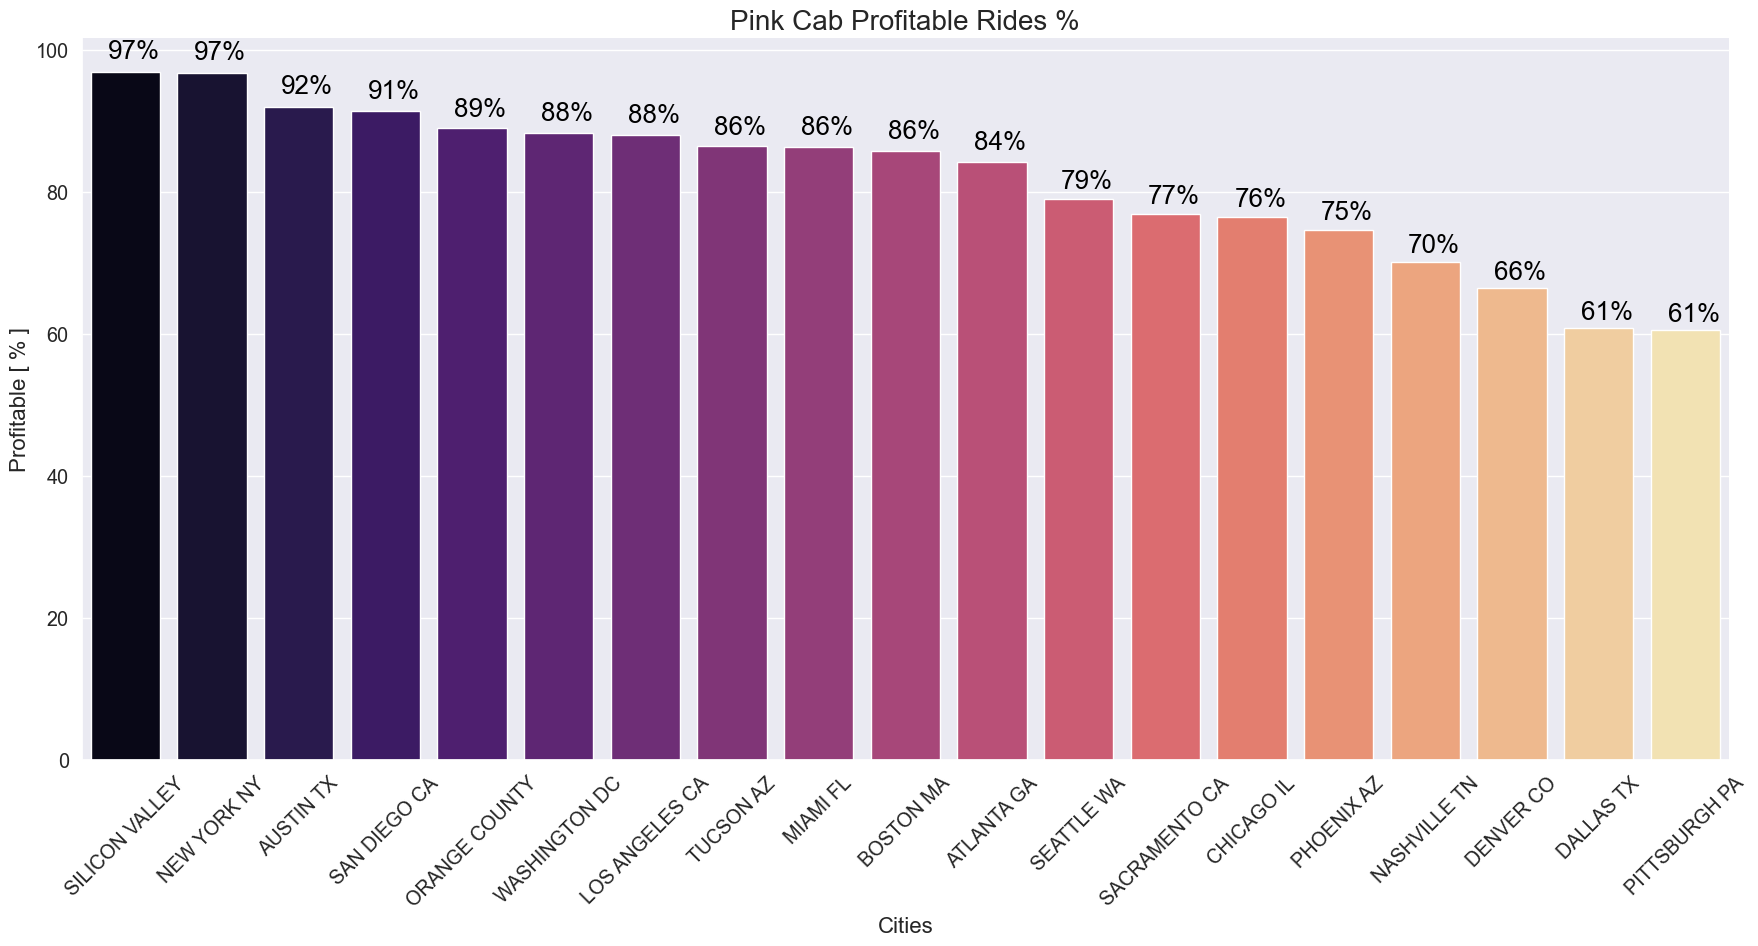

In [358]:
g=sns.catplot(x='City',y='profitability_%',data=pink_rides,kind='bar',palette = 'magma', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profitable Rides %',fontsize=20)
plt.xticks(rotation=45)
plt.show()

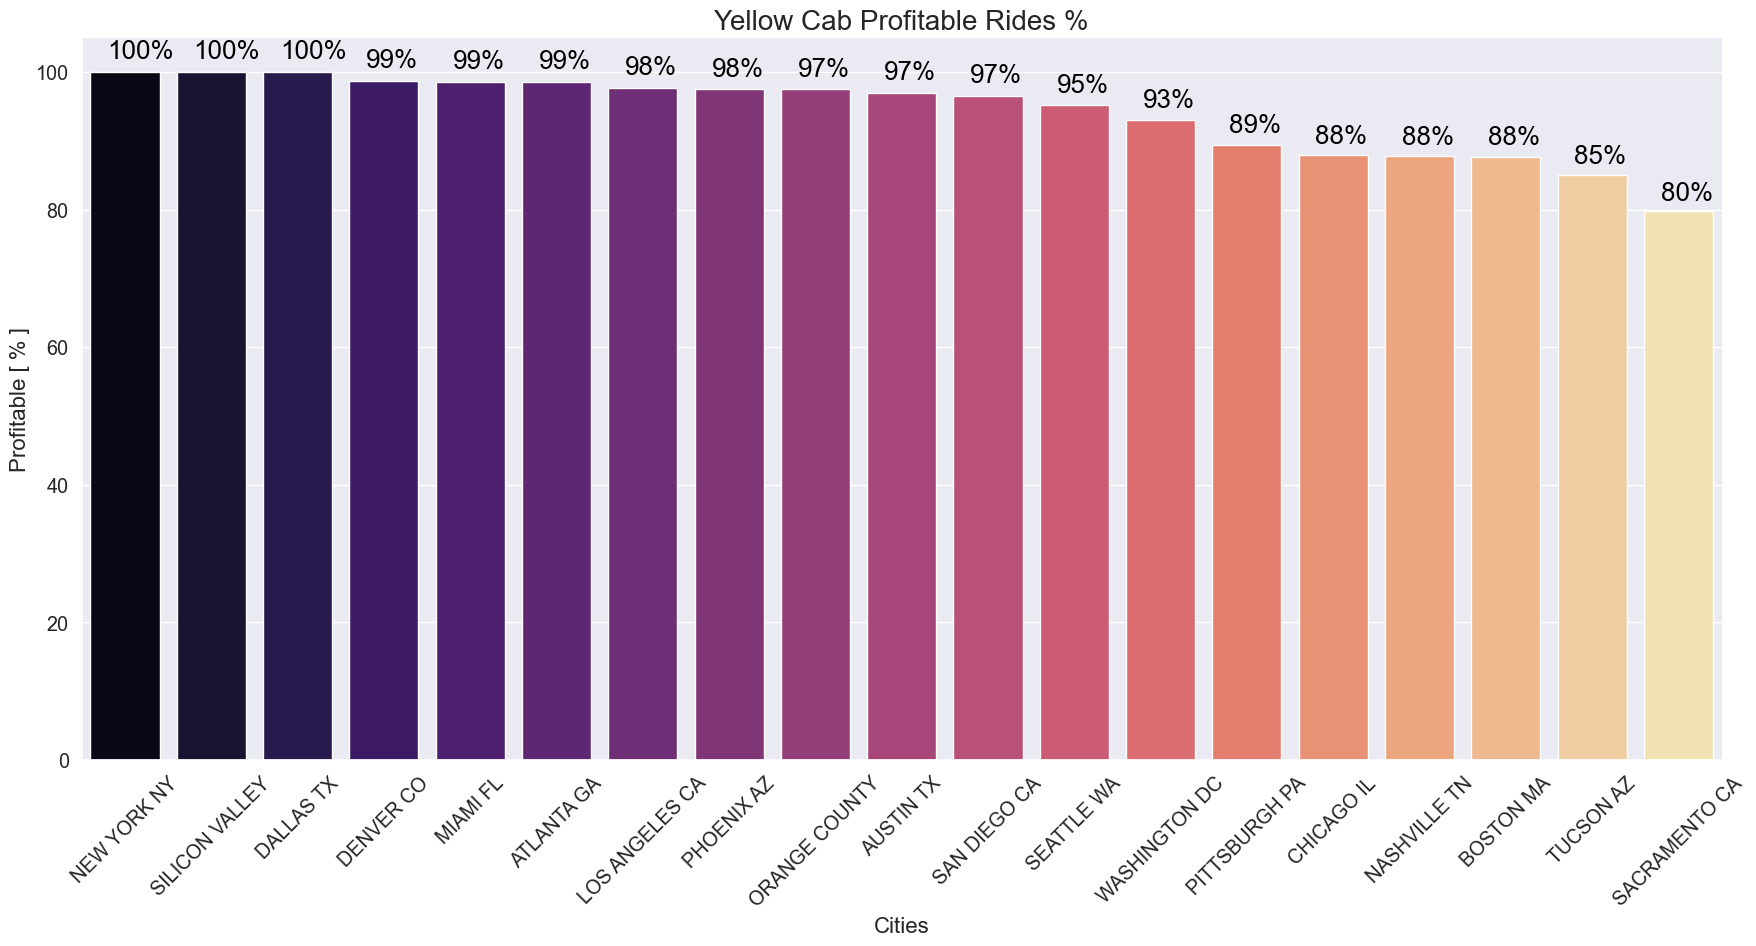

In [359]:
g=sns.catplot(x='City',y='profitability_%',data=yellow_rides,kind='bar',palette = 'magma', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profitable Rides %',fontsize=20)
plt.xticks(rotation=45)
plt.show()

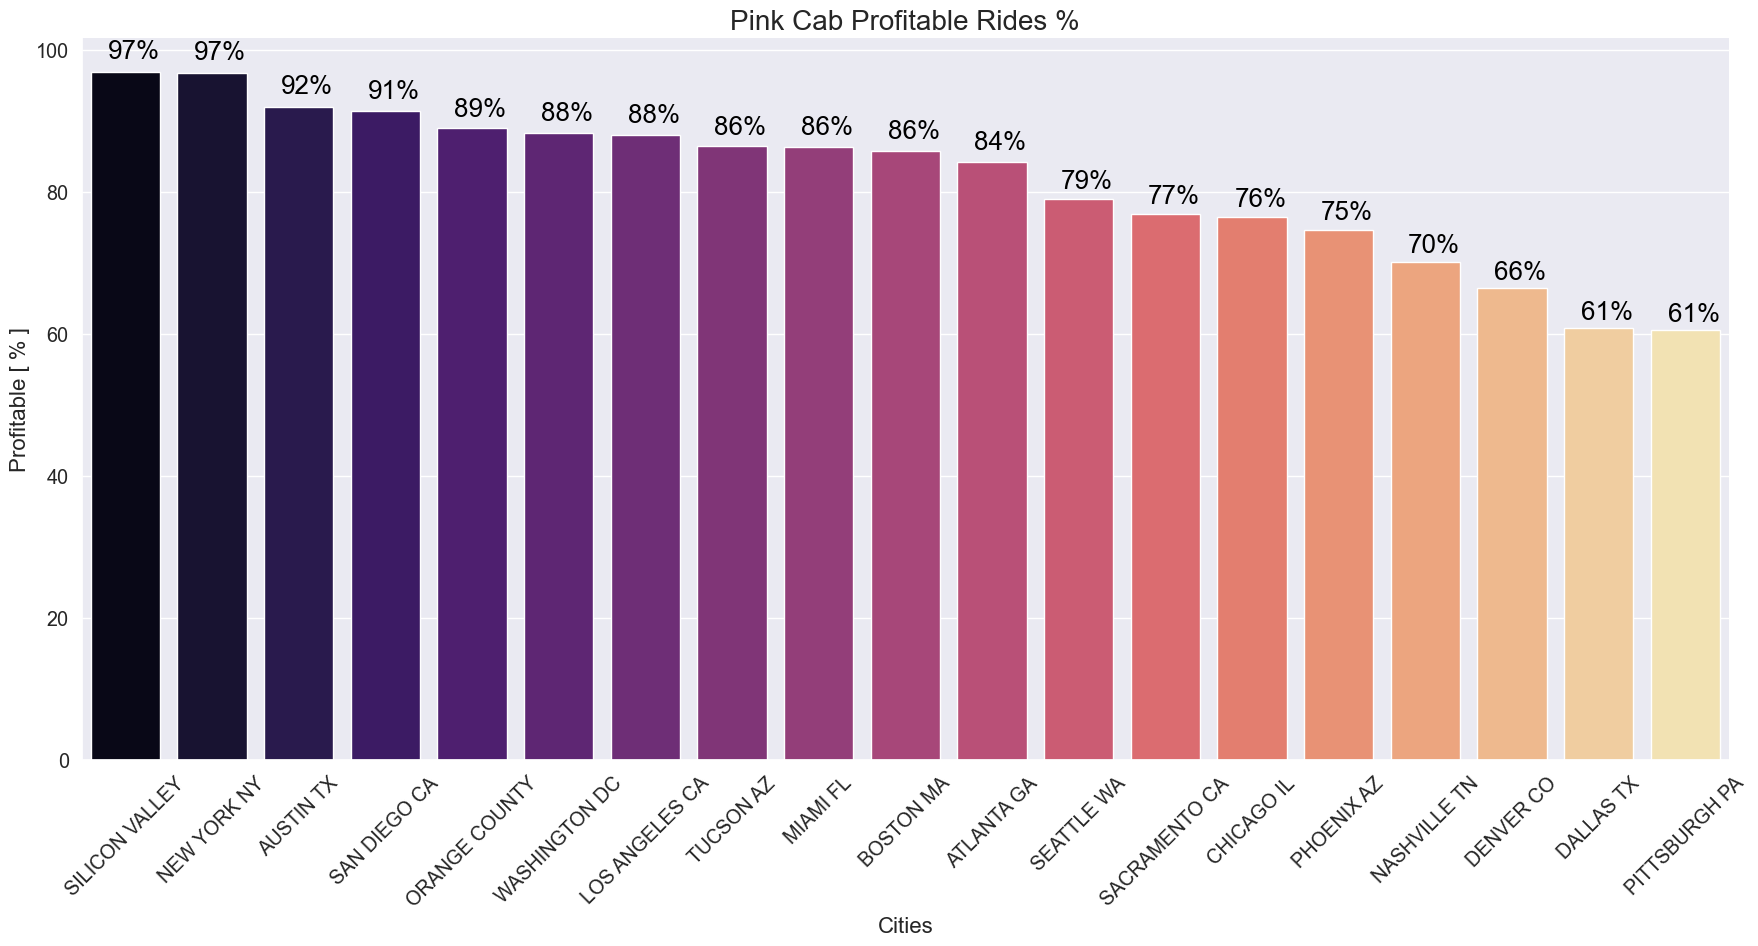

In [360]:
g=sns.catplot(x='City',y='profitability_%',data=pink_rides,kind='bar',palette = 'magma', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profitable Rides %',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [361]:
#PROFIT BY EACH COMPANY DURING HOLIDAY

y_hc = yellow_cab.groupby(['Date of Travel','is_holiday']).is_holiday.count().to_frame('trips')
y_hc=y_hc.reset_index(level='is_holiday', col_level=1)
y_hc=y_hc.reset_index(level='Date of Travel', col_level=1)
y_count =  y_hc['is_holiday'].value_counts()

p_hc = pink_cab.groupby(['Date of Travel','is_holiday']).is_holiday.count().to_frame('trips')
p_hc=p_hc.reset_index(level='is_holiday', col_level=1)
p_hc=p_hc.reset_index(level='Date of Travel', col_level=1)
p_count =  p_hc['is_holiday'].value_counts()

y_count.to_frame()
p_count.to_frame()
y_count=y_count.reset_index()
p_count=p_count.reset_index()

y_pc = yellow_cab.groupby(['Date of Travel','is_holiday']).Profit.sum().to_frame('profit')
y_pc=y_pc.reset_index(level='is_holiday', col_level=1)
y_pc=y_pc.reset_index(level='Date of Travel', col_level=1)
y_profit = y_pc.groupby(['is_holiday']).profit.sum()

p_pc = pink_cab.groupby(['Date of Travel','is_holiday']).Profit.sum().to_frame('profit')
p_pc=p_pc.reset_index(level='is_holiday', col_level=1)
p_pc=p_pc.reset_index(level='Date of Travel', col_level=1)
p_profit = p_pc.groupby(['is_holiday']).profit.sum()

y_profit.to_frame()
p_profit.to_frame()
y_profit=y_profit.reset_index()
p_profit=p_profit.reset_index()

y_profit['avg_profit_per_day']= y_profit['profit']/y_count['is_holiday']
y_profit.insert(0,'Company' ,"Yellow_cab")
y_profit

Company  is_holiday        profit  avg_profit_per_day
0  Yellow_cab       False  4.319689e+07        40522.407068
1  Yellow_cab        True  8.234872e+05        28396.111600

In [362]:
p_profit['avg_profit_per_day']= p_profit['profit']/p_count['is_holiday']
p_profit.insert(0,'Company','pink_cab')
p_profit

Company  is_holiday       profit  avg_profit_per_day
0  pink_cab       False  5172083.414         4851.860614
1  pink_cab        True   135244.907         4663.617483

In [363]:
holiday_profits = pd.concat([y_profit, p_profit], ignore_index=True)
holiday_profits

Company  is_holiday        profit  avg_profit_per_day
0  Yellow_cab       False  4.319689e+07        40522.407068
1  Yellow_cab        True  8.234872e+05        28396.111600
2    pink_cab       False  5.172083e+06         4851.860614
3    pink_cab        True  1.352449e+05         4663.617483

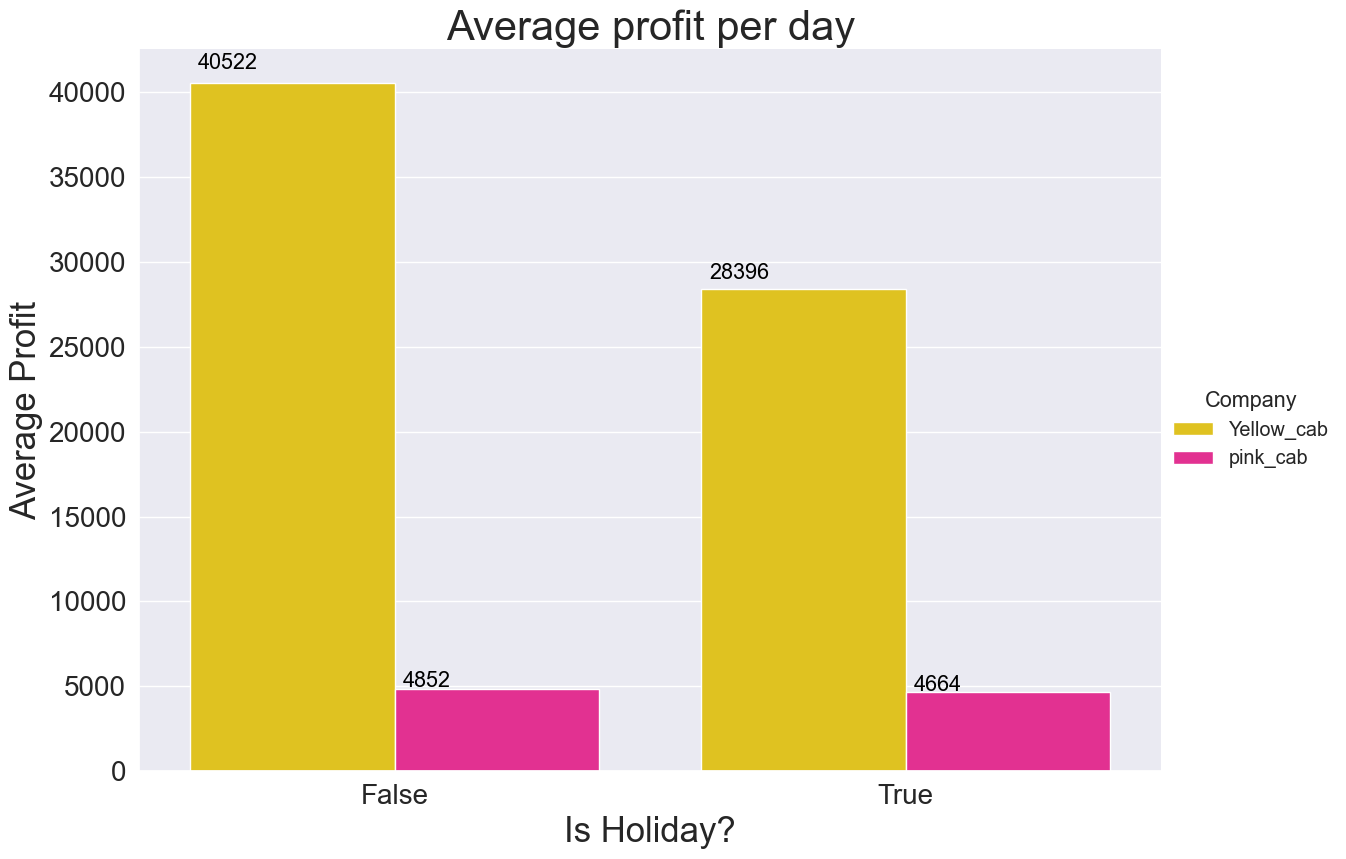

In [364]:
g=sns.catplot(x='is_holiday',y='avg_profit_per_day',data=holiday_profits,kind='bar',hue='Company',palette=sns.color_palette(['#FFD801','#FF1493']), height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Average profit per day',fontsize=30)
plt.ylabel('Average Profit',fontsize=25)
plt.xlabel('Is Holiday?',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

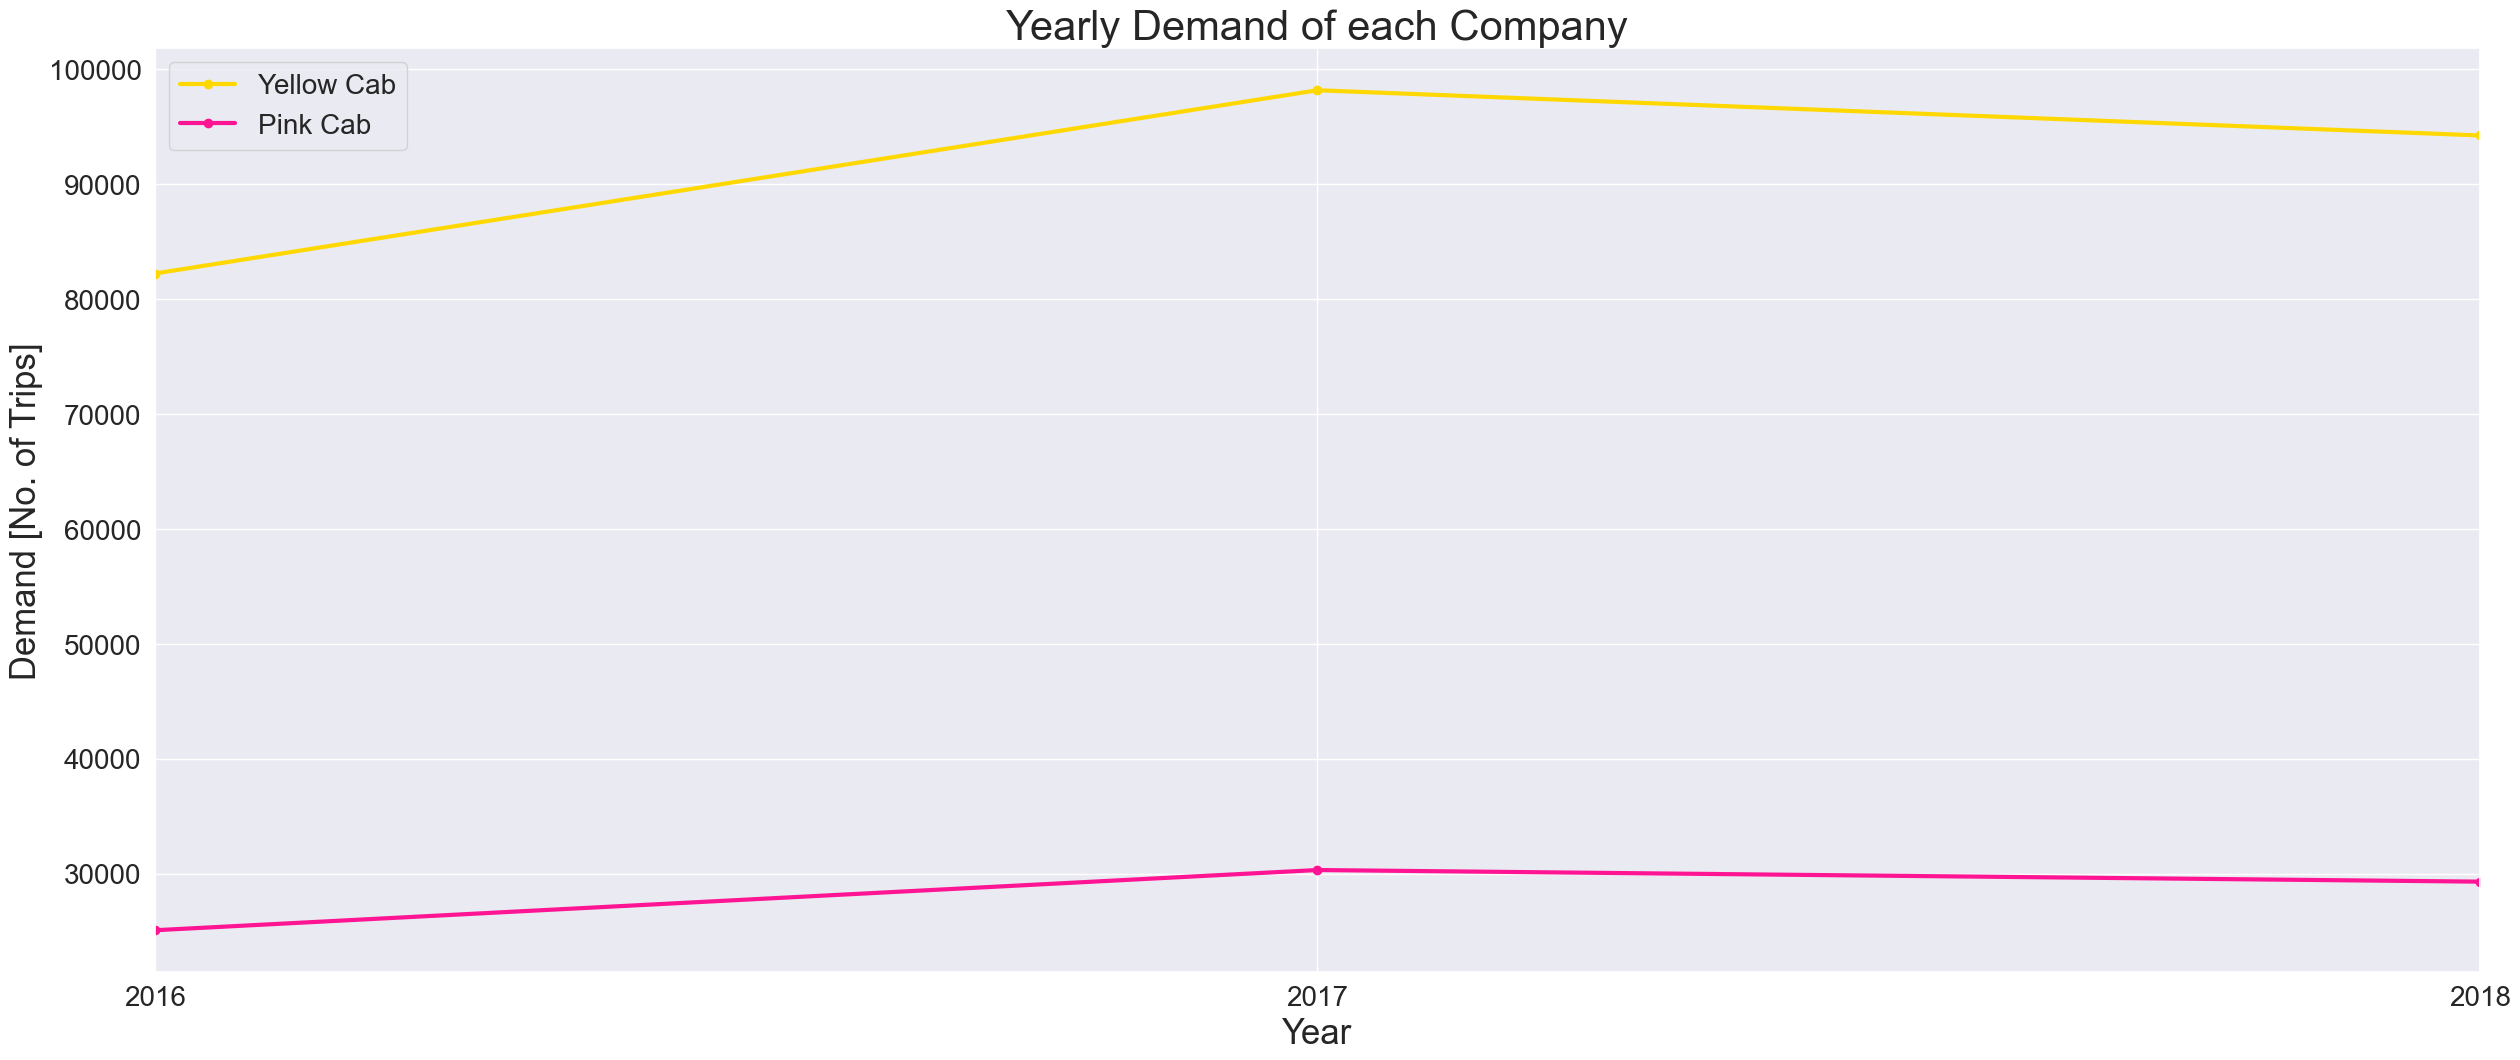

In [365]:
#YEARLY DEMAND
plt.figure(figsize=(30,12))
yellow_cab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = '#FFD801',linewidth =3,marker='o')
pink_cab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = '#FF1493',linewidth =3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'],fontsize=20)
plt.title('Yearly Demand of each Company',fontsize=30)
plt.ylabel('Demand [No. of Trips]',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

plt.show()

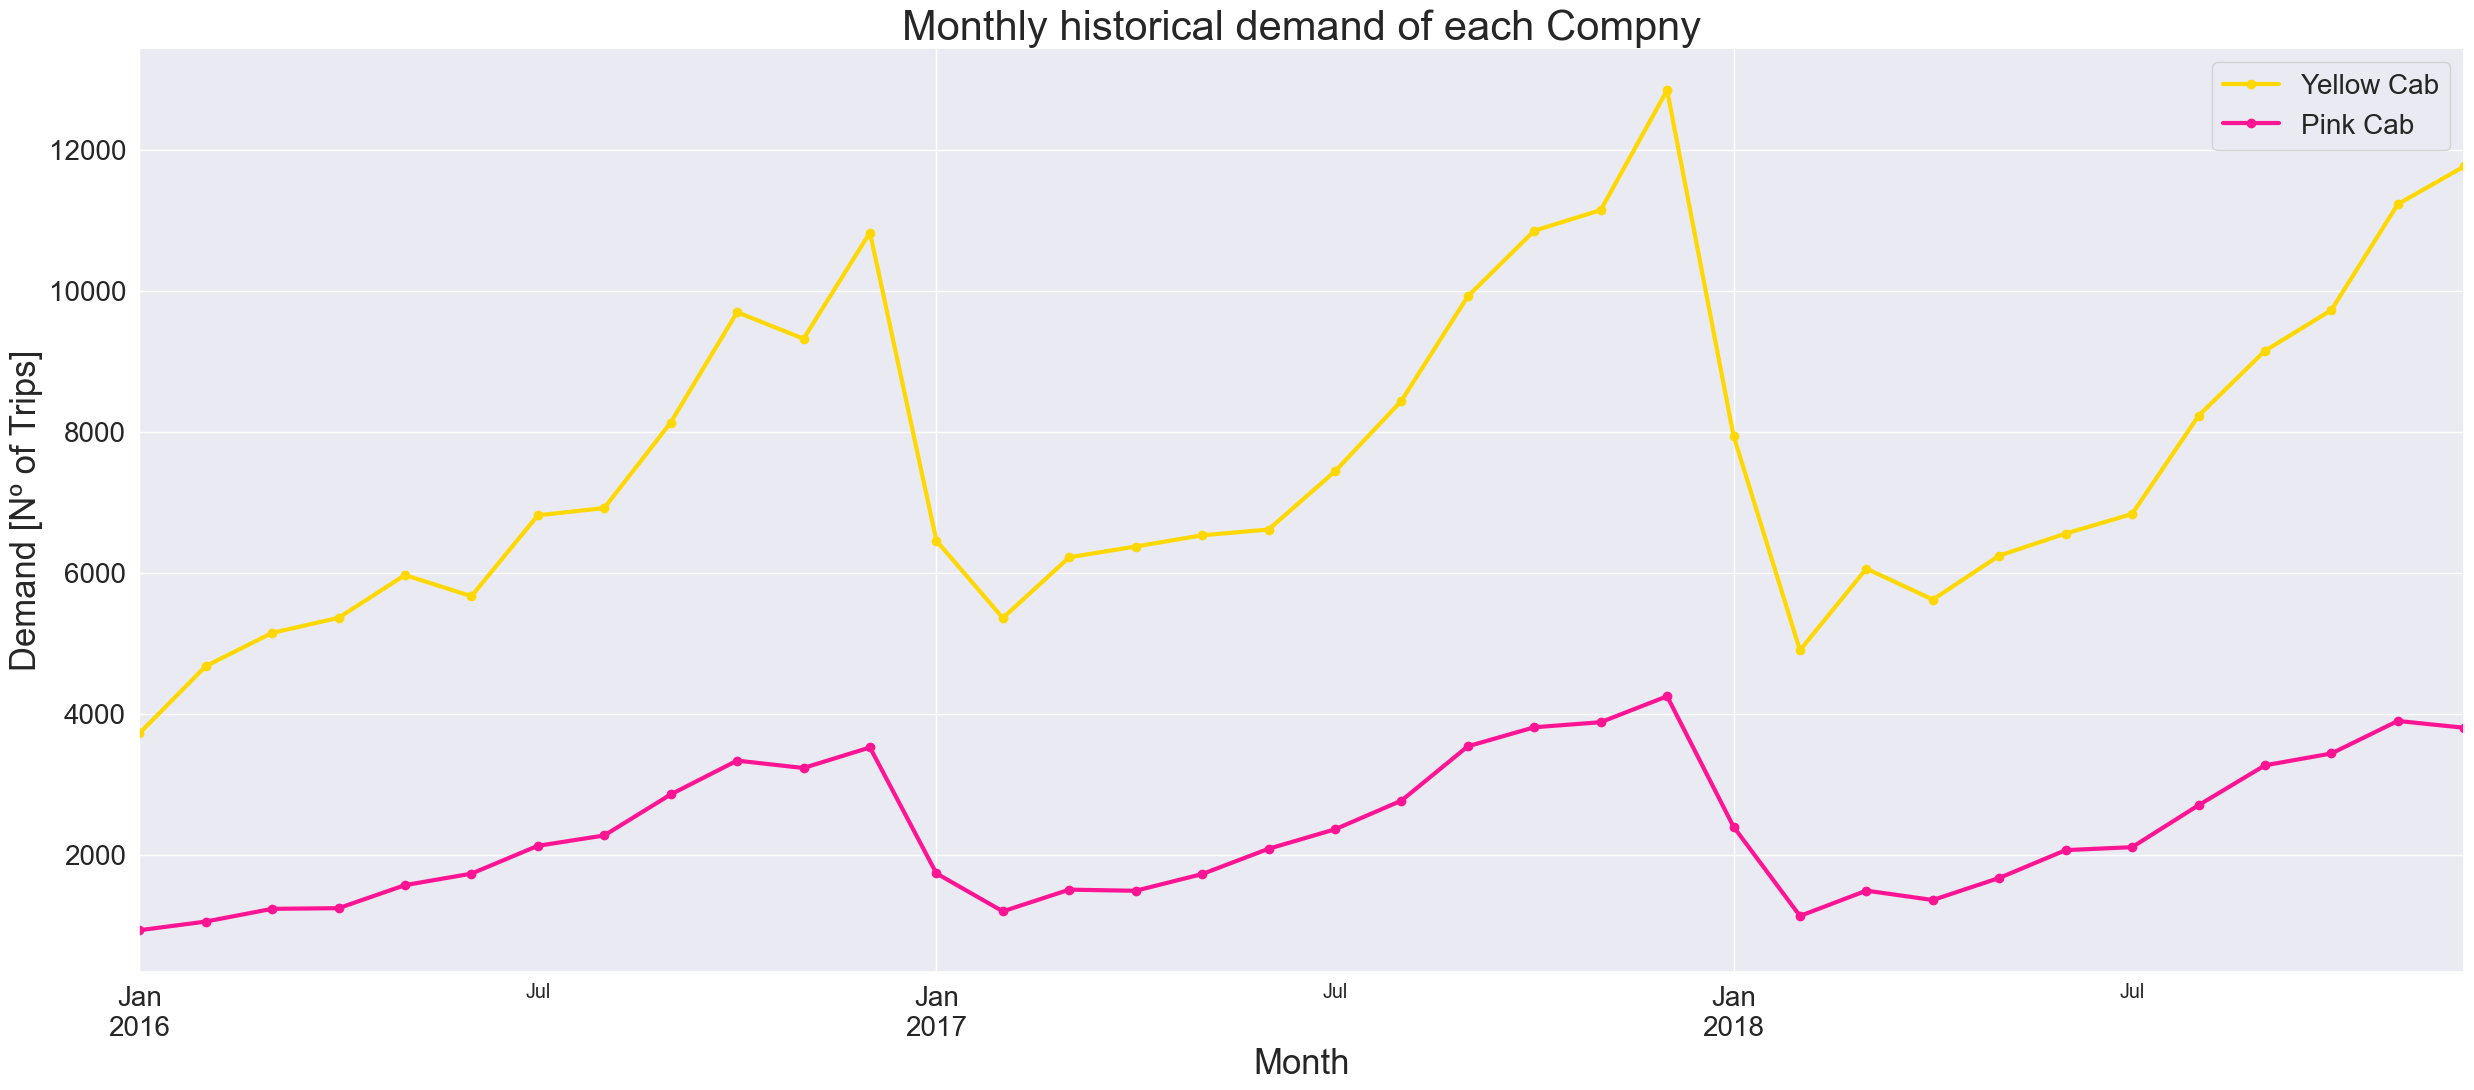

In [366]:
#MONTHLY DEMAND
plt.figure(figsize=(30,12))

yellow_cab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = '#FFD801',label='Yellow Cab Company',linewidth=3, marker='o')
pink_cab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = '#FF1493',label='Pink Cab Company',linewidth=3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'],fontsize=20)
plt.title('Monthly historical demand of each Compny',fontsize=30)
plt.ylabel('Demand [Nº of Trips]',fontsize=25)
plt.xlabel('Month',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

In [367]:
#MONTHLY USER DEMAND
dpm=master_df.groupby(['Company','Month of Travel'])['Transaction ID'].agg(['count'])
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)
dpm = dpm.sort_values(by='count', ascending= False)
dpm.head()

Company  Month of Travel  count
23  Yellow Cab               12  35439
22  Yellow Cab               11  31695
21  Yellow Cab               10  30276
20  Yellow Cab                9  27201
19  Yellow Cab                8  23584

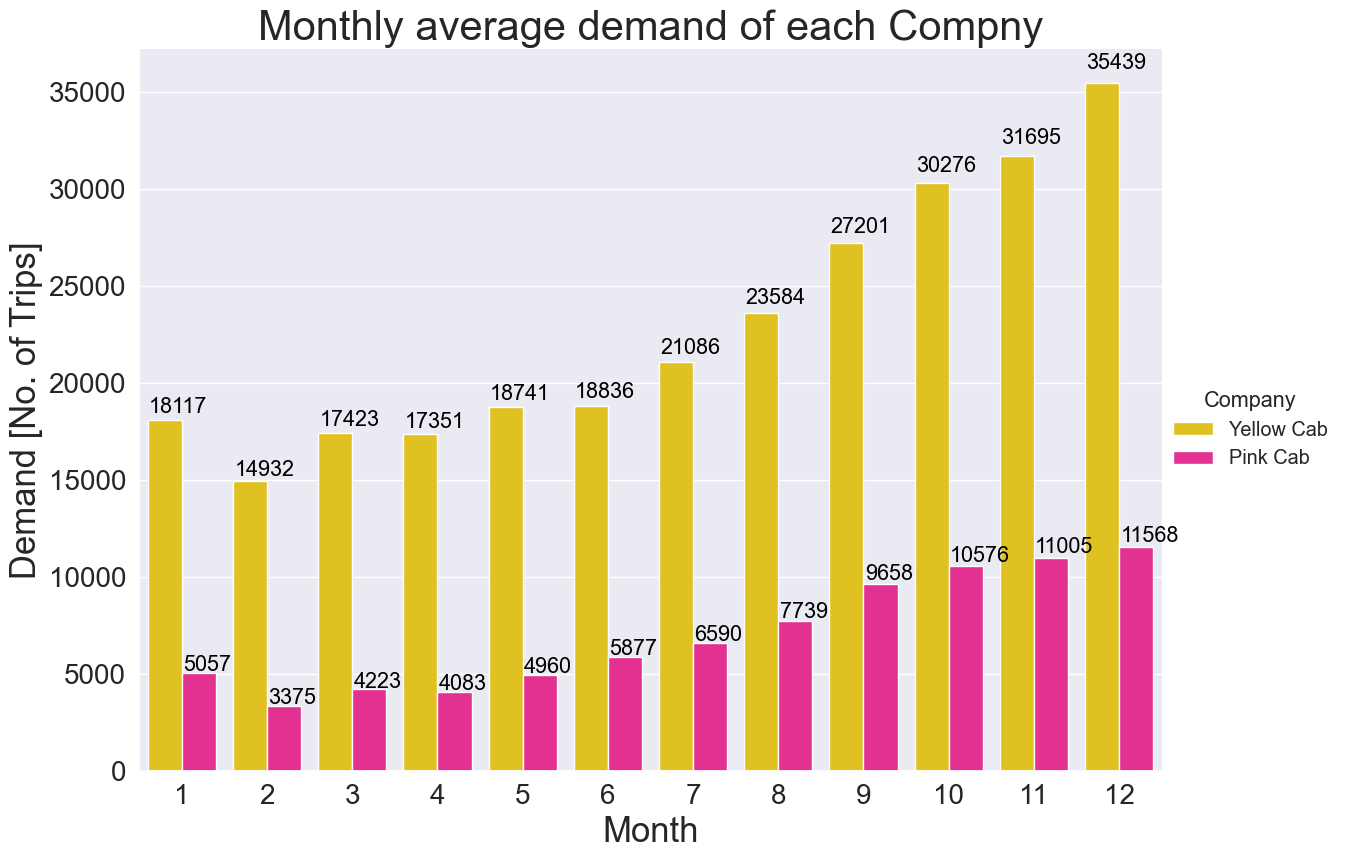

In [368]:
#GENERATING BARS

def add_value_labels1(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(0, space),         
            textcoords="offset points",
            ha='center',              
            va=va, fontsize=12)                


# Calling the function above
add_value_labels1(ax)

g=sns.catplot(x='Month of Travel',y='count',data=dpm,kind='bar',hue='Company',palette=sns.color_palette(['#FFD801', '#FF1493']), height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Monthly average demand of each Compny',fontsize=30)
plt.ylabel('Demand [No. of Trips]',fontsize=25)
plt.xlabel('Month',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

In [369]:
#DEMAND OF THE CAB BY AGE
a1=master_df[(master_df['Age']>18) & (master_df['Age']<25)]
a2=master_df[(master_df['Age']>26) & (master_df['Age']<40)]
a3=master_df[(master_df['Age']>41) & (master_df['Age']<60)]
a4=master_df[(master_df['Age']>60)]

a11= a1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Year of Travel', col_level=1)
a11=a11.reset_index(level='Company', col_level=1)
a11['Class']= '18-25'

a22= a2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Year of Travel', col_level=1)
a22=a22.reset_index(level='Company', col_level=1)
a22['Class']= '26-40'

a33= a3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Year of Travel', col_level=1)
a33=a33.reset_index(level='Company', col_level=1)
a33['Class']= '40-60'

a44= a4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Year of Travel', col_level=1)
a44=a44.reset_index(level='Company', col_level=1)
a44['Class']= '60+'

agegroup=a11
agegroup=pd.concat([agegroup,a22,a33,a44])
agegroup['Total Customers']=agegroup['Total Customers'].astype(int)
agegroup.head(5)

Company  Year of Travel  Total Customers  Class
0    Pink Cab            2016             4844  18-25
1    Pink Cab            2017             6009  18-25
2    Pink Cab            2018             5777  18-25
3  Yellow Cab            2016            16046  18-25
4  Yellow Cab            2017            19263  18-25

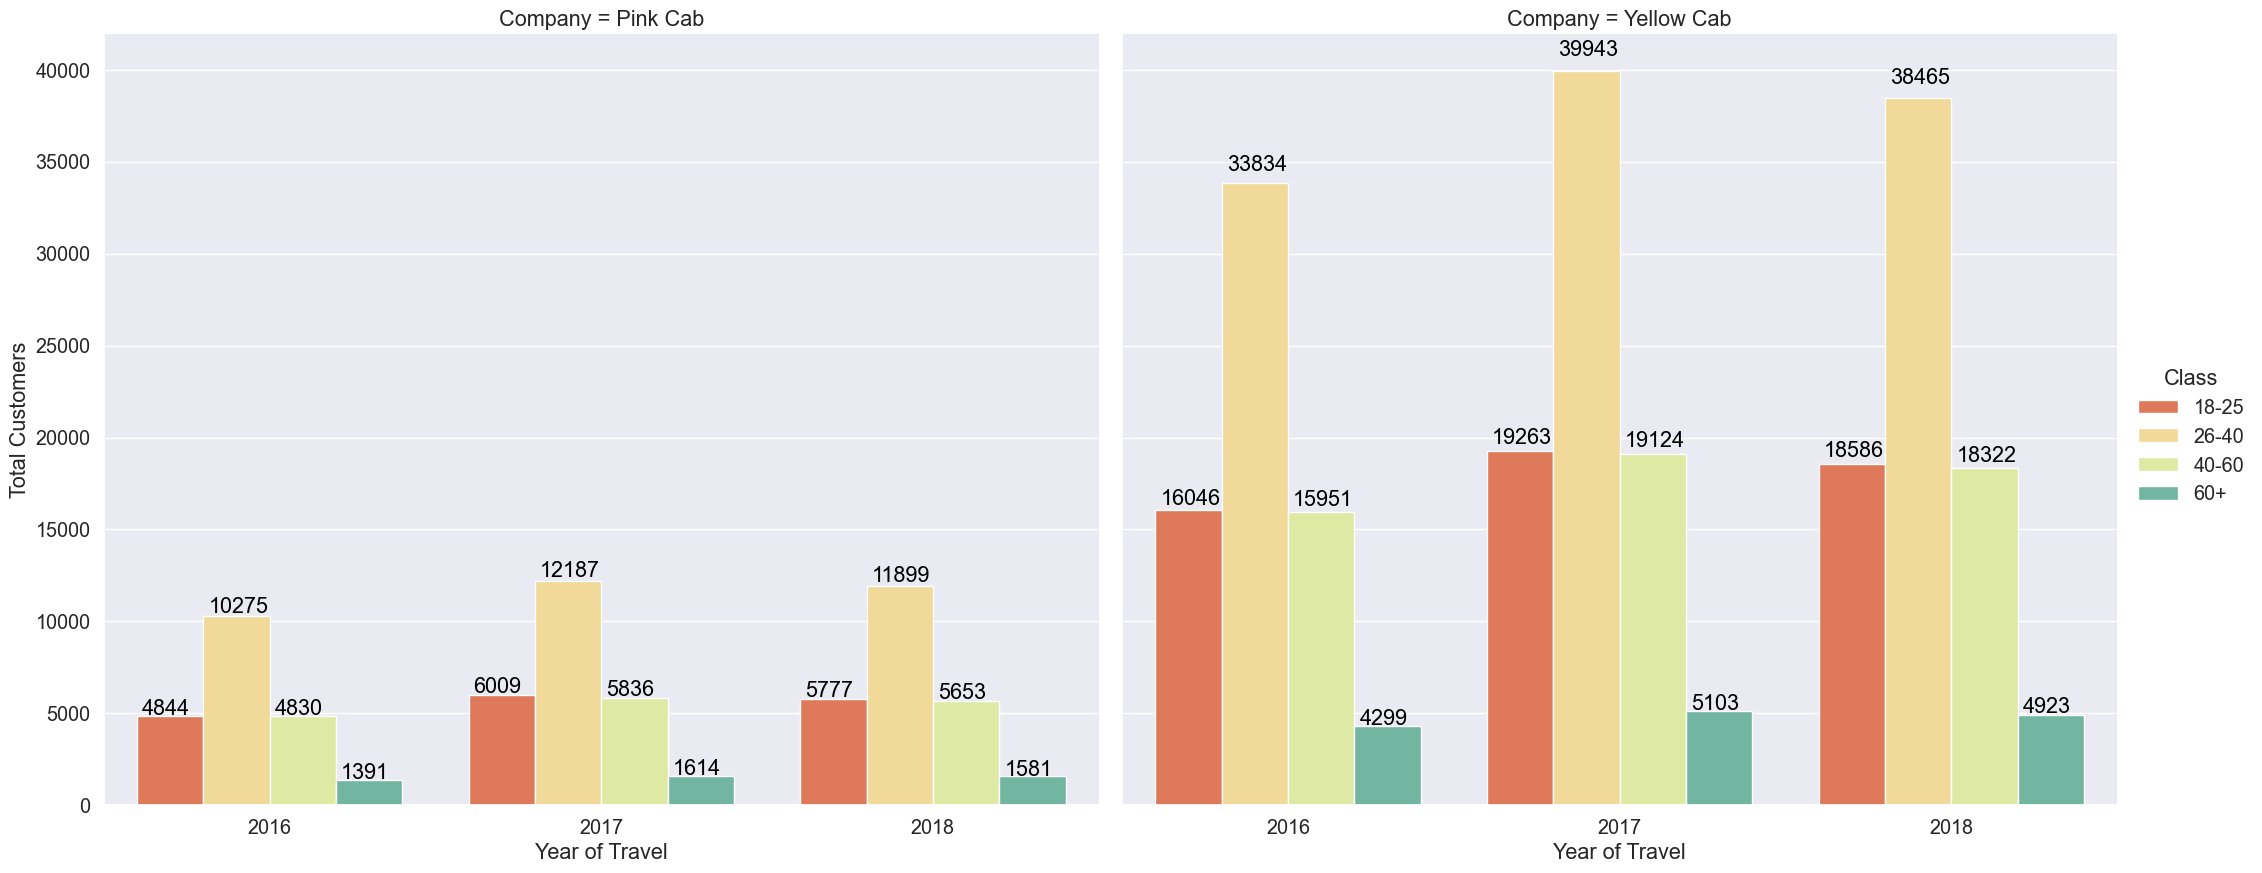

In [370]:
g=sns.catplot(x='Year of Travel',y='Total Customers',data=agegroup,col= 'Company',kind='bar',hue='Class',palette = 'Spectral', height=9, aspect=1.2)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.show()

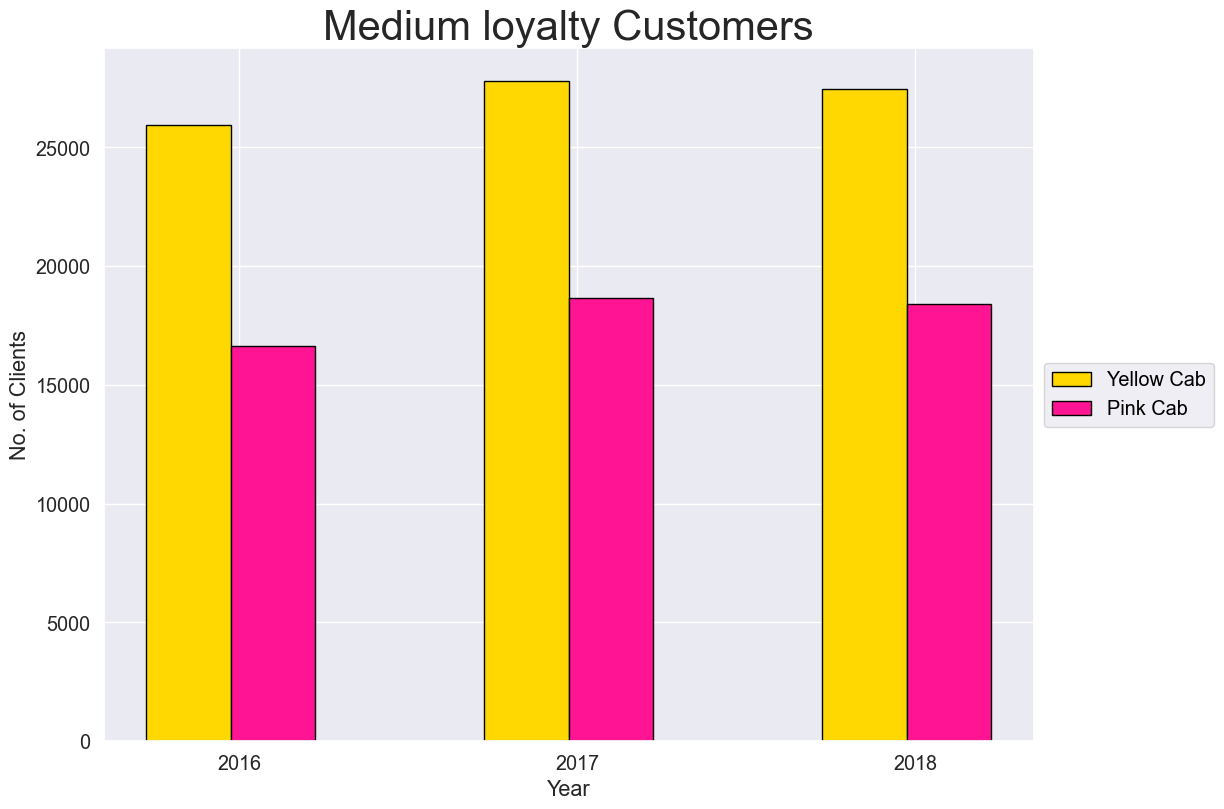

In [371]:
#CLIENT RETENTION ANALYSIS
years=[2016,2017,2018]
c10r_y=[]
c10r_p=[]
for year in years:
  yellow_year=master_df[(master_df['Year of Travel']==year) & (master_df['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_y.append(len(yellow_year))
  pink_year=master_df[(master_df['Year of Travel']==year) & (master_df['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_p.append(len(pink_year))

plt.figure(figsize=(12,9))
X = np.arange(3)
plt.bar(X+0.00,c10r_y,color='#FFD801', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_p,color='#FF1493',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Medium loyalty Customers',fontsize=30)
plt.ylabel('No. of Clients')
plt.xlabel('Year')
plt.show()

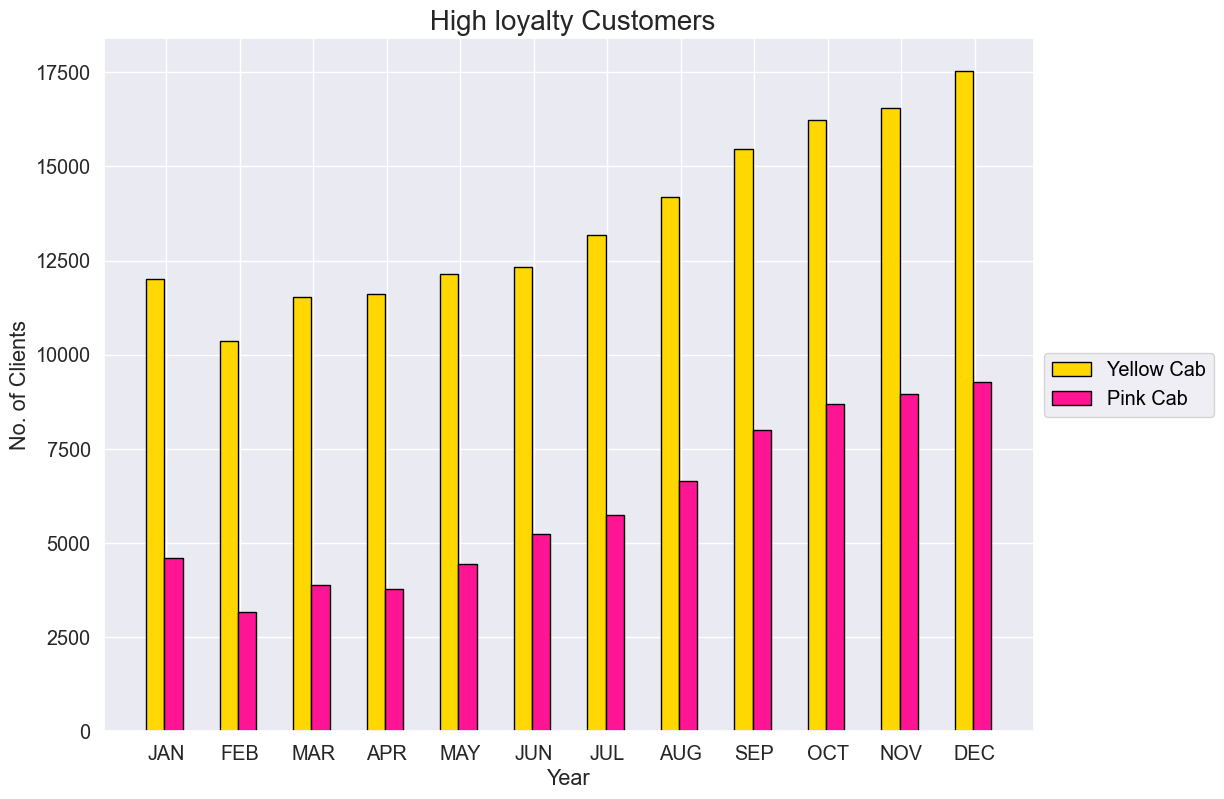

In [372]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
c10r_ym=[]
c10r_pm=[]
for month in months:
  yellow_year=master_df[(master_df['Month of Travel']==month) & (master_df['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_ym.append(len(yellow_year))
  pink_year=master_df[(master_df['Month of Travel']==month) & (master_df['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_pm.append(len(pink_year))

plt.figure(figsize=(12,9))
X = np.arange(12)
plt.bar(X+0.00,c10r_ym,color='#FFD801', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_pm,color='#FF1493',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title(' High loyalty Customers',fontsize=20)
plt.ylabel('No. of Clients')
plt.xlabel('Year')
plt.show()

In [373]:
c10r_ym=pd.DataFrame(c10r_ym)
c10r_pm=pd.DataFrame(c10r_pm)

c10r_pm.columns=c10r_pm.columns=['High Loyalty Clients']
c10r_ym.columns=c10r_ym.columns=['High Loyalty Clients']

c10r_ym['x_index'] = c10r_ym.index
c10r_ym.head()

c10r_pm['x_index'] = c10r_pm.index
c10r_pm.head()

High Loyalty Clients  x_index
0                  4607        0
1                  3176        1
2                  3874        2
3                  3786        3
4                  4436        4

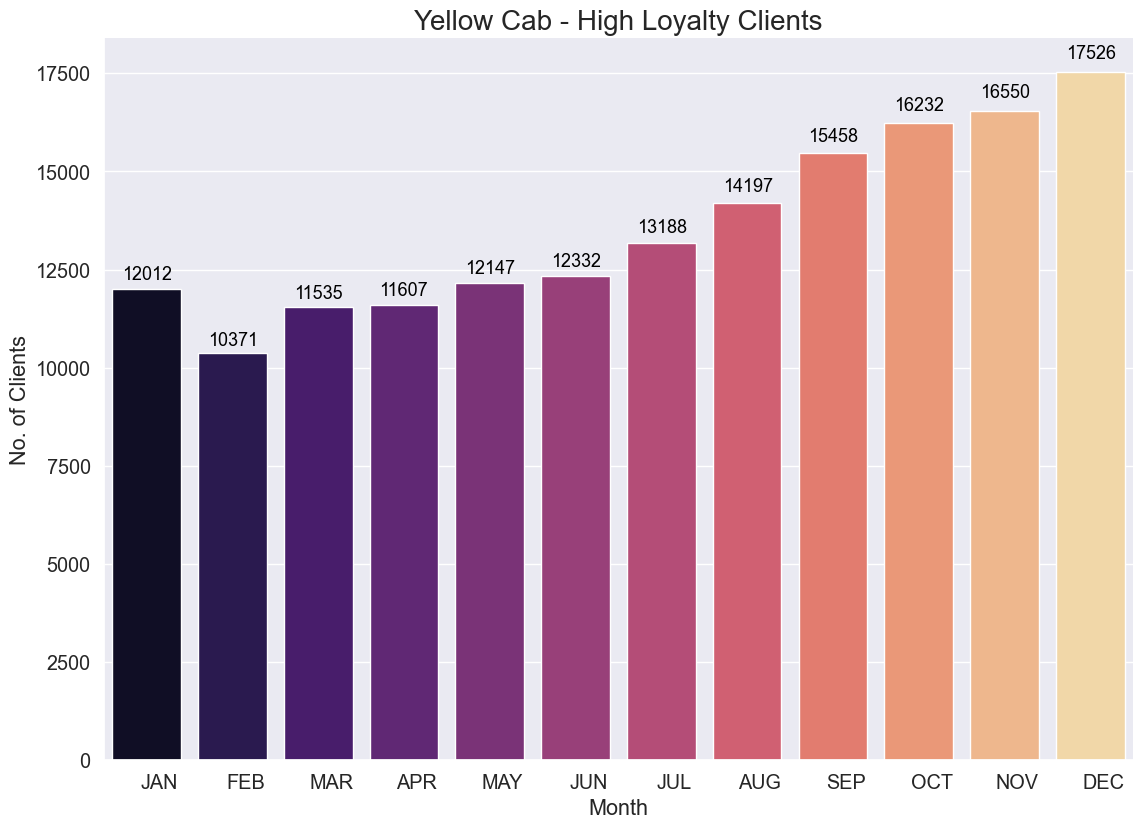

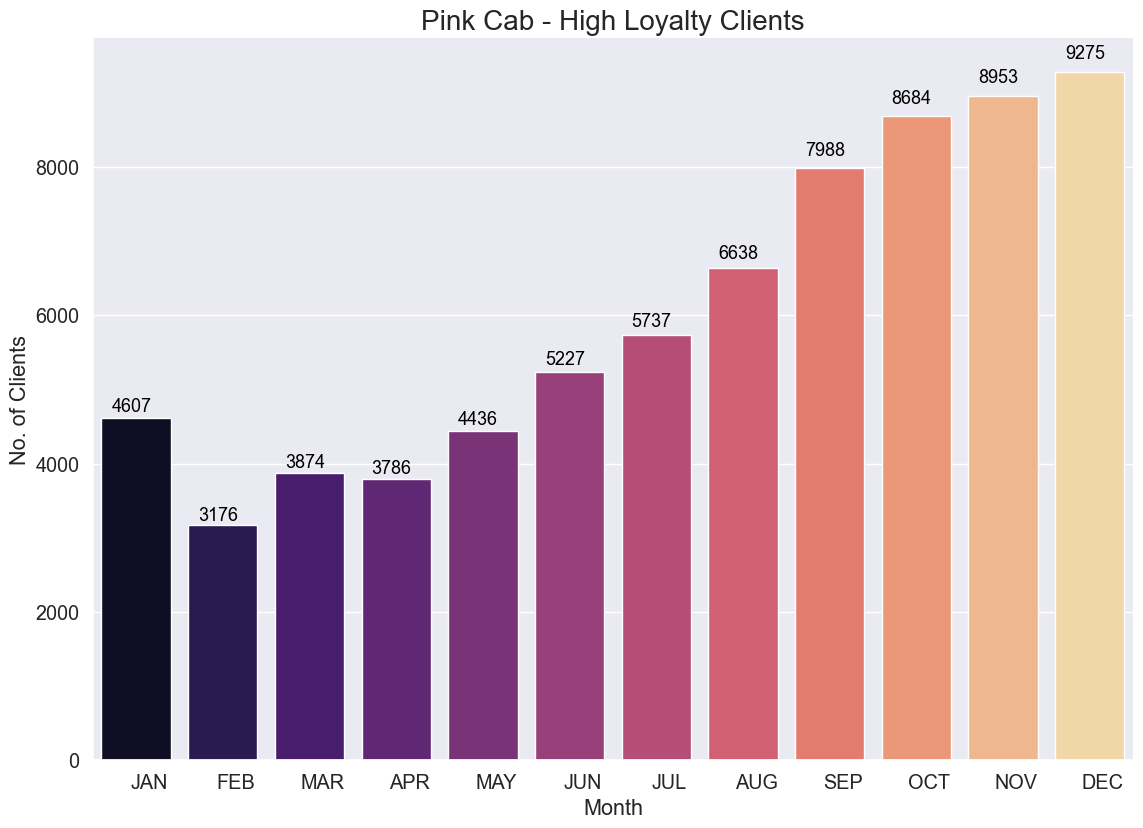

In [374]:
#YELLOW CAB
g=sns.catplot(x='x_index',y='High Loyalty Clients',data=c10r_ym,kind='bar',palette = 'magma', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title("Yellow Cab - High Loyalty Clients",fontsize=20)
plt.ylabel('No. of Clients')
plt.xlabel('Month')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()

#PINK CAB
g=sns.catplot(x= 'x_index',y='High Loyalty Clients',data=c10r_pm,kind='bar',palette = 'magma', height=8.27, aspect=11.7/8.27)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title("Pink Cab - High Loyalty Clients",fontsize=20)
plt.ylabel('No. of Clients')
plt.xlabel('Month')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()

In [375]:
#PAYMENT METHODS USED
u=master_df.groupby(['Year of Travel'])['Transaction ID'].agg(['count'])
u.columns = ['RidesPerYear']
u=u.reset_index(level='Year of Travel', col_level=1)
payment=master_df.groupby(['Year of Travel','Payment_Mode'])['Transaction ID'].agg(['count'])
payment=payment.reset_index(level='Year of Travel', col_level=1)
payment=payment.reset_index(level='Payment_Mode', col_level=1)
payment=payment.merge(u,on= 'Year of Travel')
payment.head()
payment1=payment
payment1['per']=payment1['count']/payment1['RidesPerYear']
payment.head()

Payment_Mode  Year of Travel  count  RidesPerYear       per
0         Card            2016  64339        107319  0.599512
1         Cash            2016  42980        107319  0.400488
2         Card            2017  76963        128510  0.598887
3         Cash            2017  51547        128510  0.401113
4         Card            2018  74202        123563  0.600520

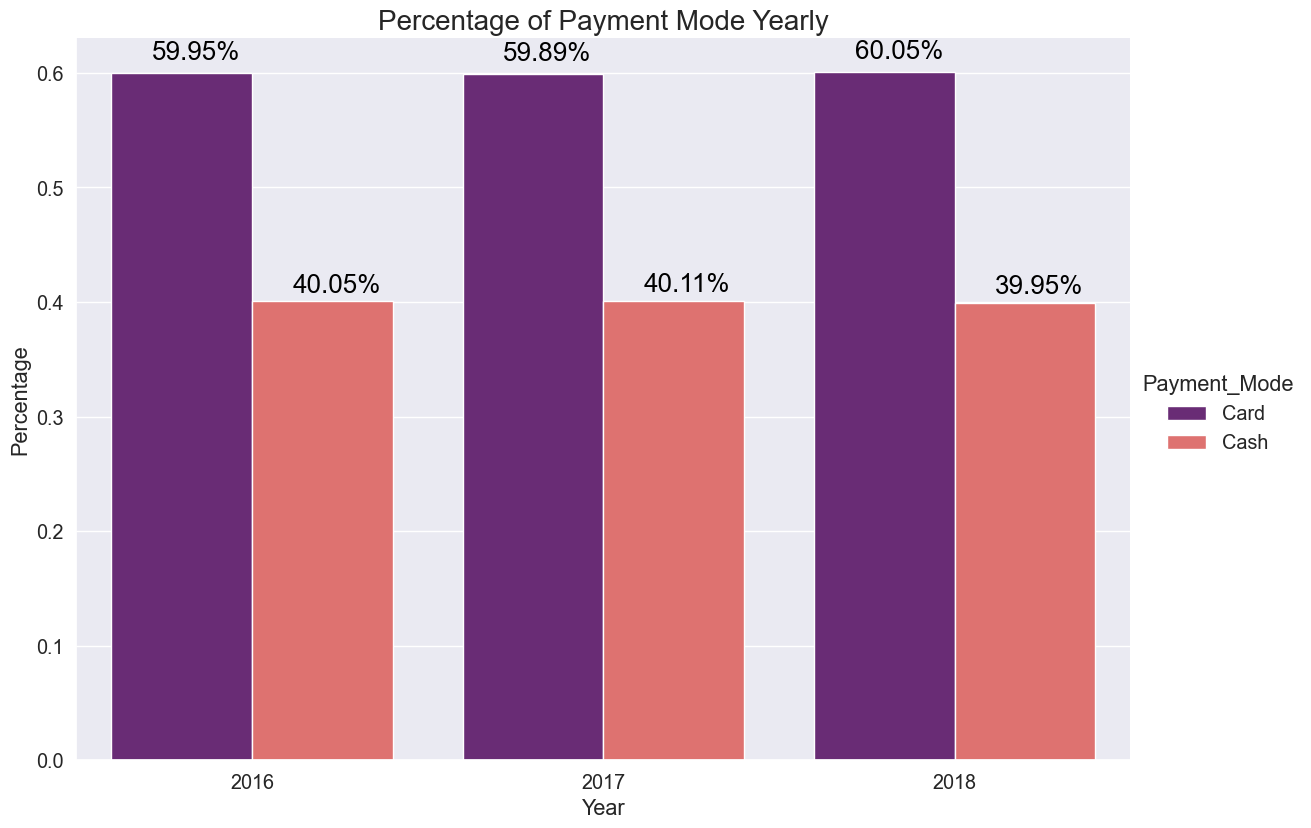

In [376]:
g=sns.catplot(x='Year of Travel',y='per',data=payment1,kind='bar',hue='Payment_Mode',palette="magma", height=8.27, aspect=11.7/8.27)
plt.title('Percentage of Payment Mode Yearly',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()*100), 
            color='black', rotation='horizontal', size='large')
plt.show()

In [377]:
#PAYMENT MODE DISTRIBUTION CITYWISE
payment2=master_df.groupby(['Year of Travel','Payment_Mode','City'])['Transaction ID'].agg(['count'])
payment2=payment2.reset_index(level='Year of Travel', col_level=1)
payment2=payment2.reset_index(level='Payment_Mode', col_level=1)
payment2=payment2.reset_index(level='City', col_level=1)
payment2 = payment2.sort_values(by='count', ascending= False )
payment2.head()

City Payment_Mode  Year of Travel  count
47   NEW YORK NY         Card            2017  21623
85   NEW YORK NY         Card            2018  20354
9    NEW YORK NY         Card            2016  17773
66   NEW YORK NY         Cash            2017  14516
104  NEW YORK NY         Cash            2018  13748

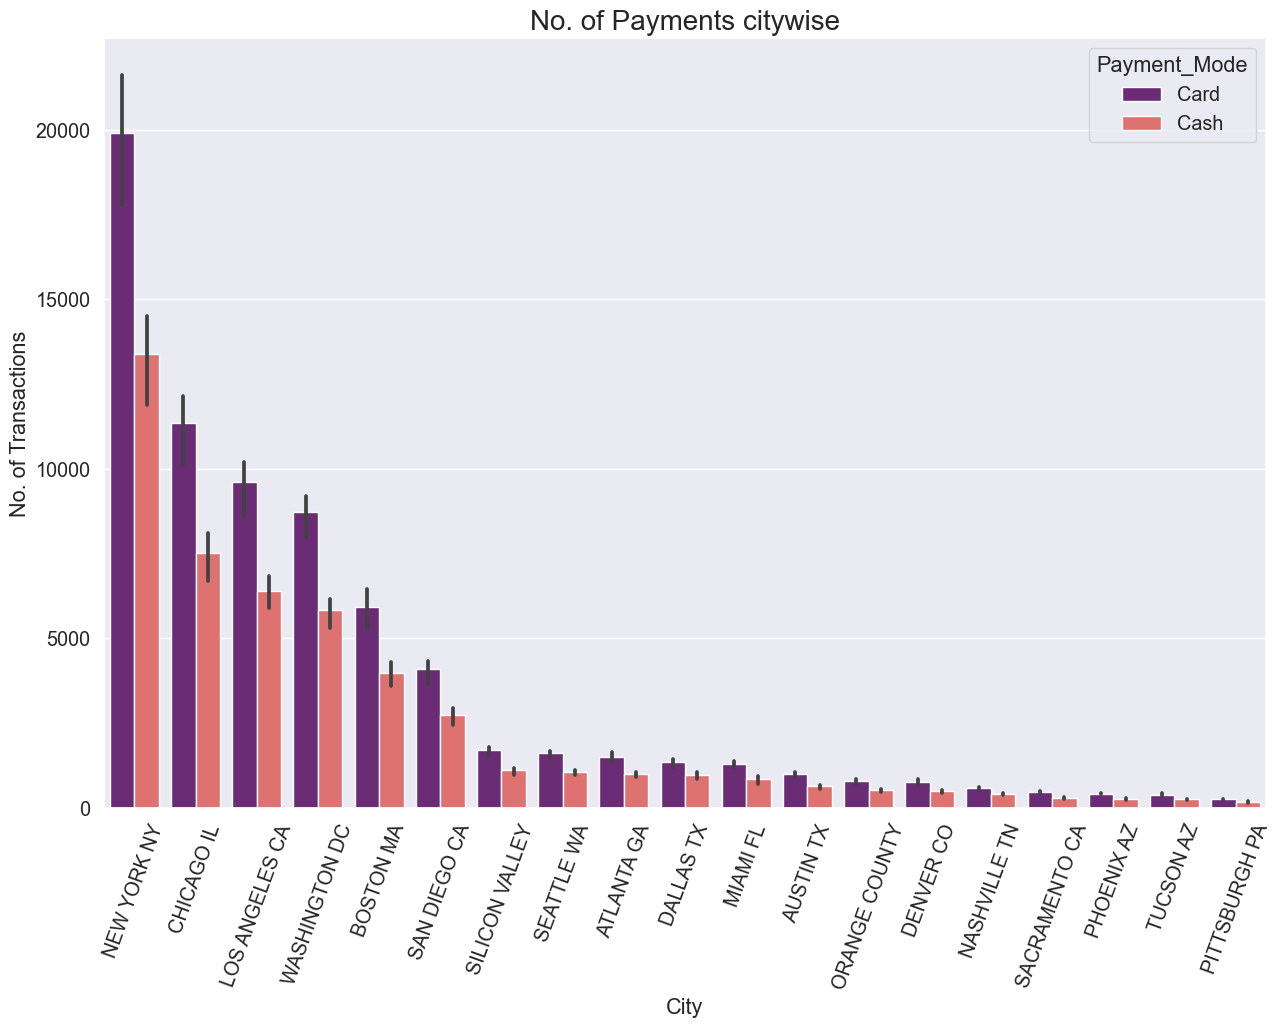

In [378]:
fig.ax = plt.subplots(figsize = (15, 10))

sns.barplot(x='City',y='count',data=payment2,hue='Payment_Mode',palette="magma")
plt.title('No. of Payments citywise',fontsize=20)
plt.xlabel('City')
plt.ylabel('No. of Transactions')
plt.xticks(rotation=70)
plt.show()

In [379]:
#PAYMENT MODE DISTRIBUTED IN AGE
a1=master_df[(master_df['Age']>18) & (master_df['Age']<25)]
a2=master_df[(master_df['Age']>26) & (master_df['Age']<40)]
a3=master_df[(master_df['Age']>41) & (master_df['Age']<60)]
a4=master_df[(master_df['Age']>60)]

a11= a1.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a11.columns=['cash/card']
a11=a11.reset_index(level='Payment_Mode', col_level=1)
a11['Class']= '18-25'

a22= a2.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a22.columns=['cash/card']
a22=a22.reset_index(level='Payment_Mode', col_level=1)
a22['Class']= '26-40'

a33= a3.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a33.columns=['cash/card']
a33=a33.reset_index(level='Payment_Mode', col_level=1)
a33['Class']= '40-60'

a44= a4.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a44.columns=['cash/card']
a44=a44.reset_index(level='Payment_Mode', col_level=1)
a44['Class']= '60+'

payage=a11
payage=pd.concat([payage,a22,a33,a44])
payage.head()

x=payage.groupby('Class').sum()
x.columns=['Total']
x=x.reset_index(level='Class', col_level=1)
x.head()

payage=payage.merge(x,on='Class')
payage['percentage'] = round(((payage['cash/card']/payage['Total'])*100),2)
payage.head()

Payment_Mode  cash/card  Class   Total  percentage
0         Card      42308  18-25   70525       59.99
1         Cash      28217  18-25   70525       40.01
2         Card      87745  26-40  146603       59.85
3         Cash      58858  26-40  146603       40.15
4         Card      41843  40-60   69716       60.02

<Figure size 1500x900 with 0 Axes>

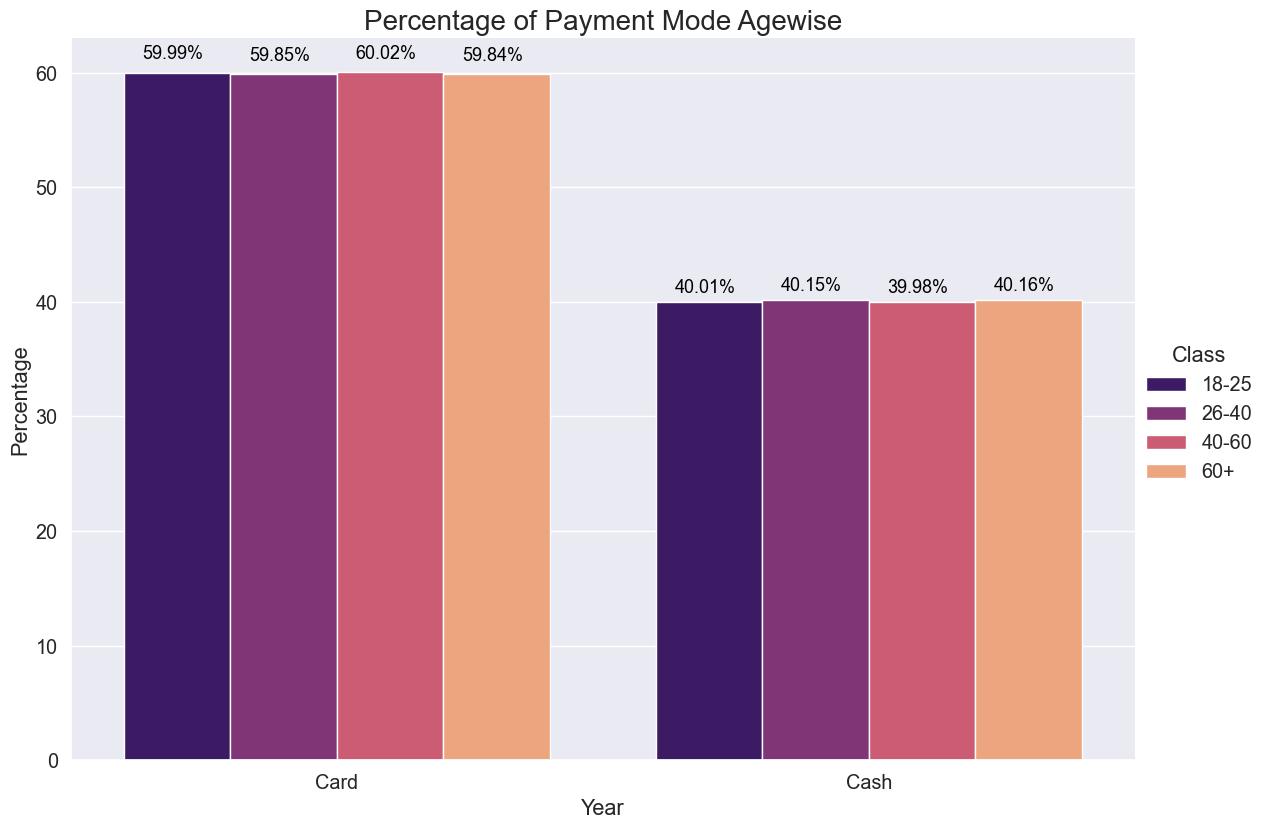

In [380]:
plt.figure(figsize=(15,9))
g=sns.catplot(x='Payment_Mode',y='percentage',data=payage,kind='bar',hue='Class', palette='magma', height=8.27, aspect=11.7/8.27)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.035, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title('Percentage of Payment Mode Agewise',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()